## Initialization : Import Library

In [88]:
import pandas as pd
import glob
import re
from tqdm import tqdm
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## **Step 1 - Data Preprocessing**

### - **Extracting data from XML file one each sample**

In [89]:
data_annotation = pd.DataFrame(columns = ['Sample_id', 'Cns_subregion', 'Sample_group', 'Subject_id']) # initialisation of the dataframe
xtree = et.parse('./Data/GSE124439_family.xml') # create a variable containing the xml in a tree shape
xroot = xtree.getroot() # get the root of the tree to start the exploration of the tree/xml
# for each element named "sample" that can be found from the root
for child in xroot.iter("{http://www.ncbi.nlm.nih.gov/geo/info/MINiML}Sample"):
    temp_sample_id = child.attrib['iid'] # the attribut of this node contains the sample id ()
    # for each element named "Characteristics" that can be found from the current sample
    for child2 in child.iter("{http://www.ncbi.nlm.nih.gov/geo/info/MINiML}Characteristics"):
        if(child2.attrib["tag"] == "cns subregion"):  ##
            temp_cns_subregion = child2.text.replace('\n', '')
        if(child2.attrib["tag"] == "sample group"):
            temp_sample_group = child2.text.replace('\n', '')
        if(child2.attrib["tag"] == "subject id"):
            temp_subject_id = child2.text.replace('\n', '')
    temp_df = pd.DataFrame({'Sample_id': [temp_sample_id.strip()], 'Cns_subregion': [temp_cns_subregion.strip()], 'Sample_group': [temp_sample_group.strip()], 'Subject_id': [temp_subject_id.strip()]})
    data_annotation = pd.concat([data_annotation, temp_df])

In [90]:
data_annotation

Sample_id   Cns_subregion      Sample_group   Subject_id
0   GSM3533230  Frontal Cortex  ALS Spectrum MND  NEUEL133AK6
0   GSM3533231  Frontal Cortex  ALS Spectrum MND  NEUYV496XLP
0   GSM3533232  Frontal Cortex  ALS Spectrum MND  NEUZU200WEQ
0   GSM3533233  Frontal Cortex  ALS Spectrum MND  NEUME287RK2
0   GSM3533234  Frontal Cortex  ALS Spectrum MND  NEUEC006FND
..         ...             ...               ...          ...
0   GSM3533401  Frontal Cortex  ALS Spectrum MND  NEUMY028JH4
0   GSM3533402  Frontal Cortex  ALS Spectrum MND  NEUXR145UBL
0   GSM3533403  Frontal Cortex  ALS Spectrum MND  NEUKN209FNW
0   GSM3533404  Frontal Cortex  ALS Spectrum MND  NEUUF289NRL
0   GSM3533405  Frontal Cortex  ALS Spectrum MND  NEUPU334DL1

[176 rows x 4 columns]

In [91]:
data_annotation['Cns_subregion'].unique() ## selection to see the different types of regions

array(['Frontal Cortex', 'Motor Cortex (Medial)',
       'Motor Cortex (Lateral)', 'Motor Cortex'], dtype=object)

*There are 4 regions represented in our samples, all parts of the brain.*

In [92]:
data_annotation['Sample_group'].unique() ## selection to see the different types of subject

array(['ALS Spectrum MND', 'Non-Neurological Control',
       'Other Neurological Disorders'], dtype=object)

*3 types of patients in our data :* 
- **Patient with ALS**
- **Patient without ALS but have other neurological disorder**
- **Patient without any neurological disorder**

In [93]:
## Number of subject, Number of samples
print("Number of patients :",len(data_annotation['Subject_id'].unique()),"\nNumber of samples :", len(data_annotation['Sample_id'].unique()))

Number of patients : 95 
Number of samples : 176


*There is 95 different patients (some sample may originate from the same patient)*

### - **Retrieving all the data from RNA-seq**

In [94]:
path = "./Data" # the path of the data

pdList = [] # variable to temporary store all dataframes (one for each txt file)
# For all txt file
for fname in glob.glob(path+"/*.txt"):
    df = pd.read_table(fname) # put the file in a dataframe
    sample_name = re.search("GSM\d+", fname).group() # search the name of the sample in the file name
    df.rename(index= df["gene/TE"], inplace=True) # rename the index (=rows) using the column containing the gene name
    df.drop(columns=df.columns[0], axis=1, inplace=True) # drop the first column containing the gene name, no more need
    df.rename(columns={ df.columns[0]: sample_name }, inplace = True) # rename the column (there is only one column at this step) using the sample name
    pdList.append(df) # add the current dataframe in the list

In [95]:
data_matrix = pd.concat(pdList, axis=1) # concat all dataframe in 1 dataframe
data_matrix

GSM3533314  GSM3533339  GSM3533344  GSM3533277  \
A1BG                            14          39          17          37   
A1BG-AS1                        41          95          43          95   
A1CF                             0           0           4           0   
A2M                           2185        1223         900        2847   
A2M-AS1                        105          74          73          98   
...                            ...         ...         ...         ...   
X8_LINE:CR1:LINE               527         354         350         545   
X9_LINE:L1:LINE                145          83          99         117   
Zaphod2:hAT-Tip100:DNA         446         300         351         377   
Zaphod3:hAT-Tip100:DNA        1522        1145        1256        1569   
Zaphod:hAT-Tip100:DNA         1757        1390        1479        1769   

                        GSM3533269  GSM3533279  GSM3533232  GSM3533338  \
A1BG                            44          38          20          28   
A1BG-AS1                       105          83          95         100   
A1CF                             1           0           0           1   
A2M                           2222        2391        1830        1025   
A2M-AS1                         63         121         121          78   
...                            ...         ...         ...         ...   
X8_LINE:CR1:LINE               246         555         571         299   
X9_LINE:L1:LINE                 52         106         126         108   
Zaphod2:hAT-Tip100:DNA         242         522         479         274   
Zaphod3:hAT-Tip100:DNA         948        2087        1659        1081   
Zaphod:hAT-Tip100:DNA         1125        2432        1778        1143   

                        GSM3533375  GSM3533272  ...  GSM3533308  GSM3533297  \
A1BG                            26          74  ...          48          20   
A1BG-AS1                        84         161  ...          65         114   
A1CF                             0           0  ...           0           0   
A2M                           1768        3094  ...        1567        1663   
A2M-AS1                         79         112  ...          89          88   
...                            ...         ...  ...         ...         ...   
X8_LINE:CR1:LINE               514         543  ...         334         484   
X9_LINE:L1:LINE                125         146  ...          73         110   
Zaphod2:hAT-Tip100:DNA         472         390  ...         266         484   
Zaphod3:hAT-Tip100:DNA        1797        1806  ...        1056        1620   
Zaphod:hAT-Tip100:DNA         1914        1977  ...        1356        1941   

                        GSM3533244  GSM3533389  GSM3533388  GSM3533235  \
A1BG                            14          20          23          15   
A1BG-AS1                       113         114         147          39   
A1CF                             0           0           0           0   
A2M                           1836         920        1271         957   
A2M-AS1                        122          75          61          74   
...                            ...         ...         ...         ...   
X8_LINE:CR1:LINE               465         371         441         267   
X9_LINE:L1:LINE                149          74         107          65   
Zaphod2:hAT-Tip100:DNA         523         303         454         256   
Zaphod3:hAT-Tip100:DNA        1862        1141        1640         866   
Zaphod:hAT-Tip100:DNA         1957        1217        1751         977   

                        GSM3533285  GSM3533392  GSM3533390  GSM3533399  
A1BG                            37          42          30          46  
A1BG-AS1                       136         175          85         179  
A1CF                             0           0           0           0  
A2M                           2595        2684        1670        2899  
A2M-AS1                         88         

In [96]:
# transpose the dataframe to get a more standard shape with sample as entry and gene as columns
data_matrix = data_matrix.transpose() 
data_matrix

A1BG  A1BG-AS1  A1CF   A2M  A2M-AS1  A2ML1  A2MP1  A3GALT2  \
GSM3533314    14        41     0  2185      105    198      4        0   
GSM3533339    39        95     0  1223       74     89      1        3   
GSM3533344    17        43     4   900       73    113      1        2   
GSM3533277    37        95     0  2847       98    164      8        6   
GSM3533269    44       105     1  2222       63     74      9        2   
...          ...       ...   ...   ...      ...    ...    ...      ...   
GSM3533235    15        39     0   957       74     48      1        2   
GSM3533285    37       136     0  2595       88    162      0        1   
GSM3533392    42       175     0  2684       83    105      2        3   
GSM3533390    30        85     0  1670       78    245      3        0   
GSM3533399    46       179     0  2899       89    109      1        6   

            A4GALT  A4GNT  ...  X6B_LINE:CR1:LINE  X7A_LINE:CR1:LINE  \
GSM3533314      24      0  ...                958               2017   
GSM3533339      39      0  ...                687               1424   
GSM3533344       6      1  ...                727               1561   
GSM3533277      22      0  ...                873               1785   
GSM3533269      17      0  ...                482               1060   
...            ...    ...  ...                ...                ...   
GSM3533235      21      0  ...                446               1066   
GSM3533285      26      0  ...               1032               2523   
GSM3533392      15      0  ...                705               1548   
GSM3533390      34      0  ...                712               1641   
GSM3533399      46      1  ...                796               1694   

            X7B_LINE:CR1:LINE  X7C_LINE:CR1:LINE  X7D_LINE:CR1:LINE  \
GSM3533314               1817               1087                 99   
GSM3533339               1340                693                101   
GSM3533344               1372                702                 83   
GSM3533277               1823                887                112   
GSM3533269               1073                532                 69   
...                       ...                ...                ...   
GSM3533235               1022                635                 63   
GSM3533285               2216               1399                131   
GSM3533392               1299                733                 61   
GSM3533390               1515                868                 70   
GSM3533399               1488                869                 89   

            X8_LINE:CR1:LINE  X9_LINE:L1:LINE  Zaphod2:hAT-Tip100:DNA  \
GSM3533314               527              145                     446   
GSM3533339               354               83                     300   
GSM3533344               350               99                     351   
GSM3533277               545              117                     377   
GSM3533269               246               52                     242   
...                      ...              ...                     ...   
GSM3533235               267               65                     256   
GSM3533285               717              183                     605   
GSM3533392               441              123                     372   
GSM3533390               410              106                     318   
GSM3533399               469               99                     442   

            Zaphod3:hAT-Tip100:DNA  Zaphod:hAT-Tip100:DNA  
GSM3533314                    1522                   1757  
GSM3533339                    1145                   1390  
GSM3533344                    1256                   1479  
GSM3533277                    1569                   1769  
GSM3533269                     948                   1125  
...                            ...                    ...  
GSM3533235                     866                    977  
GSM3533285                    2275              

In [97]:
# A list with all possible genes in our data
list_all_genes = list(data_matrix.columns.values) 
print("Number of genes :",len(list_all_genes))

Number of genes : 28953


### - **Merging in a unique dataframe all the information**

In [98]:
data_frame_merged = data_annotation.merge(data_matrix, right_index=True, left_on="Sample_id")

In [99]:
data_frame_merged

Sample_id   Cns_subregion      Sample_group   Subject_id  A1BG  A1BG-AS1  \
0   GSM3533230  Frontal Cortex  ALS Spectrum MND  NEUEL133AK6    42       149   
0   GSM3533231  Frontal Cortex  ALS Spectrum MND  NEUYV496XLP    25       107   
0   GSM3533232  Frontal Cortex  ALS Spectrum MND  NEUZU200WEQ    20        95   
0   GSM3533233  Frontal Cortex  ALS Spectrum MND  NEUME287RK2    22       101   
0   GSM3533234  Frontal Cortex  ALS Spectrum MND  NEUEC006FND    22       102   
..         ...             ...               ...          ...   ...       ...   
0   GSM3533401  Frontal Cortex  ALS Spectrum MND  NEUMY028JH4    23       113   
0   GSM3533402  Frontal Cortex  ALS Spectrum MND  NEUXR145UBL   134       300   
0   GSM3533403  Frontal Cortex  ALS Spectrum MND  NEUKN209FNW    64       290   
0   GSM3533404  Frontal Cortex  ALS Spectrum MND  NEUUF289NRL   124       332   
0   GSM3533405  Frontal Cortex  ALS Spectrum MND  NEUPU334DL1    76       193   

    A1CF   A2M  A2M-AS1  A2ML1  ...  X6B_LINE:CR1:LINE  X7A_LINE:CR1:LINE  \
0      0  3327      101     78  ...                986               2218   
0      2  1787      153    109  ...               1216               2373   
0      0  1830      121    127  ...                905               2018   
0      0  2131      142    143  ...                935               2278   
0      0  1706       83    178  ...                966               2295   
..   ...   ...      ...    ...  ...                ...                ...   
0      0  2130       72     71  ...                553               1243   
0      0  6077      171     42  ...                719               1988   
0      0  4752      118    174  ...                623               1466   
0      0  3516      141    173  ...                743               1846   
0      0  4278      140    102  ...                695               1782   

    X7B_LINE:CR1:LINE  X7C_LINE:CR1:LINE  X7D_LINE:CR1:LINE  X8_LINE:CR1:LINE  \
0                2096               1120                 84               556   
0                2001               1144                118               582   
0                1815               1011                 84               571   
0                2032               1198                 97               562   
0                1993               1152                 96               582   
..                ...                ...                ...               ...   
0                1089                658                 72               320   
0                1691                966                119               460   
0                1246                726                 61               358   
0                1680                936                110               479   
0                1432                929                 67               456   

    X9_LINE:L1:LINE  Zaphod2:hAT-Tip100:DNA  Zaphod3:hAT-Tip100:DNA  \
0               134                     570                    2045   
0               153                     552                    2057   
0               126                     479                    1659   
0               132                     540                    2032   
0               124                     539                    1742   
..              ...                     ...                     ...   
0                73                     311                    1102   
0               109                     399                    1619   
0               107                     347                    1284   
0               120                     503                    1646   
0               104                     427                    1619   

    Zaphod:hAT-Tip100:DNA  
0                    2446  
0                    2279  
0                    1778  
0                    2135  
0                    1939  
..                    ...  
0                    1169  
0                    1724  
0                    1469  
0

In [100]:
# we set Sample_id as the index of this dataframe
data_frame_merged = data_frame_merged.set_index('Sample_id')
data_frame_merged

Cns_subregion      Sample_group   Subject_id  A1BG  A1BG-AS1  \
Sample_id                                                                   
GSM3533230  Frontal Cortex  ALS Spectrum MND  NEUEL133AK6    42       149   
GSM3533231  Frontal Cortex  ALS Spectrum MND  NEUYV496XLP    25       107   
GSM3533232  Frontal Cortex  ALS Spectrum MND  NEUZU200WEQ    20        95   
GSM3533233  Frontal Cortex  ALS Spectrum MND  NEUME287RK2    22       101   
GSM3533234  Frontal Cortex  ALS Spectrum MND  NEUEC006FND    22       102   
...                    ...               ...          ...   ...       ...   
GSM3533401  Frontal Cortex  ALS Spectrum MND  NEUMY028JH4    23       113   
GSM3533402  Frontal Cortex  ALS Spectrum MND  NEUXR145UBL   134       300   
GSM3533403  Frontal Cortex  ALS Spectrum MND  NEUKN209FNW    64       290   
GSM3533404  Frontal Cortex  ALS Spectrum MND  NEUUF289NRL   124       332   
GSM3533405  Frontal Cortex  ALS Spectrum MND  NEUPU334DL1    76       193   

            A1CF   A2M  A2M-AS1  A2ML1  A2MP1  ...  X6B_LINE:CR1:LINE  \
Sample_id                                      ...                      
GSM3533230     0  3327      101     78      4  ...                986   
GSM3533231     2  1787      153    109      2  ...               1216   
GSM3533232     0  1830      121    127      1  ...                905   
GSM3533233     0  2131      142    143      5  ...                935   
GSM3533234     0  1706       83    178      1  ...                966   
...          ...   ...      ...    ...    ...  ...                ...   
GSM3533401     0  2130       72     71      2  ...                553   
GSM3533402     0  6077      171     42      8  ...                719   
GSM3533403     0  4752      118    174      8  ...                623   
GSM3533404     0  3516      141    173      3  ...                743   
GSM3533405     0  4278      140    102      2  ...                695   

            X7A_LINE:CR1:LINE  X7B_LINE:CR1:LINE  X7C_LINE:CR1:LINE  \
Sample_id                                                             
GSM3533230               2218               2096               1120   
GSM3533231               2373               2001               1144   
GSM3533232               2018               1815               1011   
GSM3533233               2278               2032               1198   
GSM3533234               2295               1993               1152   
...                       ...                ...                ...   
GSM3533401               1243               1089                658   
GSM3533402               1988               1691                966   
GSM3533403               1466               1246                726   
GSM3533404               1846               1680                936   
GSM3533405               1782               1432                929   

            X7D_LINE:CR1:LINE  X8_LINE:CR1:LINE  X9_LINE:L1:LINE  \
Sample_id                                                          
GSM3533230                 84               556              134   
GSM3533231                118               582              153   
GSM3533232                 84               571              126   
GSM3533233                 97               562              132   
GSM3533234                 96               582              124   
...                       ...               ...              ...   
GSM3533401                 72               320               73   
GSM3533402                119               460              109   
GSM3533403                 61               358              107   
GSM3533404                110               479              120   
GSM3533405                 67               456              104   

            Zaphod2:hAT-Tip100:DNA  Zaphod3:hAT-Tip100:DNA  \
Sample_id                                                    
GSM3533230                     570                    2045   
GSM3533231                     552                    2057   
GSM3

### **Median Ratio Normalization (MRN) :**
*The MRN method is based on the assumption that the majority of genes are not differentially expressed between samples. It corrects for technical biases such as* \
*differences in sequencing depth across samples. This method makes the counts comparable between samples while preserving true biological variation in gene expression.*
1. Let $K_{ij}$ be the raw count of gene $i$ in sample $j$, with $m$ samples and $n$ genes in total.

2. Compute the **geometric mean** of the counts for each gene $i$ across all samples:

   $$
   G_i = \exp \left( \frac{1}{m} \sum_{j=1}^{m} \ln(K_{ij}) \right)
   $$
    *Note: To avoid problems with $\log(0)$, a pseudocount (e.g., $K_{ij} + 1$) is added.*

3. Compute the **ratios** of each gene's count in a sample to its geometric mean:

   $$
   R_{ij} = \frac{K_{ij}}{G_i}
   $$

4. The **normalization factor** $s_j$ for sample $j$ is the median of all ratios $R_{ij}$ for that sample:

   $$
   s_j = \text{median}_i \left( \frac{K_{ij}}{G_i} \right)
   $$

5. The **normalized counts** are obtained by dividing each raw count by its sample's normalization factor:

   $$
   K_{ij}^{(\text{norm})} = \frac{K_{ij}}{s_j}
   $$

In [101]:
class als_rnaseq:
    """ Class containing the data and some methods to select specific entries or columns"""
    def __init__(self):
        self.__data_matrix = data_frame_merged # we set the merged dataframe as the default data
        self.__list_genes = list_all_genes # we give the list of all genes for future use

    def get_data_matrix(self): # get the merged dataframe with all informations
        return self.__data_matrix
    
    def get_data_genes(self) : # get only the RNA-seq information from each sample (i.e filters all information from XML)
        return self.get_data_matrix()[self.__list_genes]
    
    def get_data_subregion_genes(self) : # get in addition of genes count, the subregion of origin
        list_features = ['Cns_subregion'] ## get the subregion column
        list_features.extend(self.__list_genes) ## add all the genes
        return self.get_data_matrix()[list_features] ## filter everything out outside of subregion and genes
    
    def get_mrn_data_genes(self) : # apply the Median Ratio Normalization
        geometric_mean = np.exp(np.mean(np.log(self.get_data_genes() + 1), axis=1)) ## get the geometric mean (cf. step 2)
        ratios = self.get_data_genes().div(geometric_mean, axis=0) ## get the ratios (cf. step 3)
        normalization_factors = ratios.median(axis=0) ## get the normlization factors (cf. step 4)
        normalized_data = self.get_data_genes().div(normalization_factors, axis=1) ## get the final normalization on the data (cf. step 5)
        normalized_data = normalized_data.fillna(0) ## fill NaN values from previous calculations with 0
        normalized_data = normalized_data.replace([np.inf, -np.inf], 0) ## fill inf values from previous calculations with 0
        return normalized_data
    
    def get_data_als(self, normalized=True) :
        df = self.get_data_matrix() ## get the whole dataframe
        df_als = df[ df['Sample_group'] == 'ALS Spectrum MND'] ## filter out only ALS sample
        if not normalized: ## if we don't want normalized data
            return df_als[self.__list_genes]
        else : ## if we want normalized data
            df_normalized = self.get_mrn_data_genes() ## get normalized data
            df_normalized = df_normalized.loc[df_als.index] ## filter out only ALS normalized data
            return df_normalized

    def get_data_control(self, normalized=True) :
        df = self.get_data_matrix() ## get the whole dataframe
        df_als = df[ df['Sample_group'] != 'ALS Spectrum MND'] ## filter out only non ALS sample
        if not normalized: ## if we don't want normalized data
            return df_als[self.__list_genes]
        else : ## if we want normalized data
            df_normalized = self.get_mrn_data_genes() ## get normalized data
            df_normalized = df_normalized.loc[df_als.index] ## filter out only non ALS normalized data
            return df_normalized

    def __str__(self):
        return "Data Frame of RNA seq samples"

In [102]:
data_instance = als_rnaseq()

In [103]:
data_instance.get_data_als()

A1BG    A1BG-AS1  A1CF         A2M    A2M-AS1      A2ML1  \
Sample_id                                                                    
GSM3533230   62.142795   64.963009   0.0   74.308365  51.167678  31.418698   
GSM3533231   36.989759   46.651288   0.0   39.912548  77.511433  43.905617   
GSM3533232   29.591807   41.419368   0.0   40.872951  61.299891  51.156086   
GSM3533233   32.550988   44.035328   0.0   47.595769  71.938715  57.600947   
GSM3533234   32.550988   44.471321   0.0   38.103417  42.048686  71.699081   
...                ...         ...   ...         ...        ...        ...   
GSM3533401   34.030578   49.267248   0.0   47.573434  36.475968  28.599071   
GSM3533402  198.265108  130.798004   0.0  135.729465  86.630425  16.917761   
GSM3533403   94.693783  126.438071   0.0  106.135662  59.780059  70.087865   
GSM3533404  183.469204  144.749792   0.0   78.529669  71.432104  69.685061   
GSM3533405  112.448867   84.146716   0.0   95.548898  70.925494  41.085990   

                 A2MP1     A3GALT2      A4GALT  A4GNT  ...  X6B_LINE:CR1:LINE  \
Sample_id                                              ...                      
GSM3533230   89.142205    0.000000   92.834541    0.0  ...          59.272313   
GSM3533231   44.571103   23.397455   34.639754    0.0  ...          73.098511   
GSM3533232   22.285551   23.397455   15.241492    0.0  ...          54.403086   
GSM3533233  111.427756   23.397455   49.881246    0.0  ...          56.206503   
GSM3533234   22.285551   70.192364   42.953295    0.0  ...          58.070035   
...                ...         ...         ...    ...  ...                ...   
GSM3533401   44.571103   70.192364   29.097394    0.0  ...          33.242991   
GSM3533402  178.284410  116.987274  311.757788    0.0  ...          43.221899   
GSM3533403  178.284410   46.794910  187.054673    0.0  ...          37.450964   
GSM3533404   66.856654   46.794910  266.033312    0.0  ...          44.664633   
GSM3533405   44.571103   70.192364  195.368214    0.0  ...          41.779166   

            X7A_LINE:CR1:LINE  X7B_LINE:CR1:LINE  X7C_LINE:CR1:LINE  \
Sample_id                                                             
GSM3533230          62.552192          62.885055          62.301173   
GSM3533231          66.923513          60.034826          63.636199   
GSM3533232          56.911778          54.454378          56.237934   
GSM3533233          64.244316          60.964901          66.640005   
GSM3533234          64.723751          59.794807          64.081207   
...                       ...                ...                ...   
GSM3533401          35.055173          32.672627          36.601939   
GSM3533402          56.065716          50.734078          53.734762   
GSM3533403          41.344235          37.383005          40.384511   
GSM3533404          52.061022          50.404052          52.065981   
GSM3533405          50.256089          42.963454          51.676598   

            X7D_LINE:CR1:LINE  X8_LINE:CR1:LINE  X9_LINE:L1:LINE  \
Sample_id                                                          
GSM3533230          45.360002         59.051866        60.100423   
GSM3533231          63.720003         61.813285        68.622125   
GSM3533232          45.360002         60.644992        56.512338   
GSM3533233          52.380003         59.689117        59.203402   
GSM3533234          51.840003         61.813285        55.615317   
...                       ...               ...              ...   
GSM3533401          38.880002         33.986686        32.741275   
GSM3533402          64.260003         48.855861        48.887657   
GSM3533403          32.940002         38.022605        47.990636   
GSM3533404          59.400003         50.873820        53.821274   
GSM3533405          36.180002         48.431027        46.645104   

            Zaphod2:hAT-Tip100:DNA  Zaphod3:hAT-Tip100:DNA  \
Sample_id                                                    
GSM3533230      

In [104]:
data_instance.get_data_control()

A1BG   A1BG-AS1  A1CF         A2M    A2M-AS1       A2ML1  \
Sample_id                                                                    
GSM3533238   50.306072  36.623441   0.0   15.120758  22.797480   38.266363   
GSM3533251  161.275349  67.142976   0.0   57.177461  68.899051   47.128047   
GSM3533259   93.214192  55.807149   0.0   44.312532  38.502411   30.613091   
GSM3533266   54.744843  54.063175   0.0   54.765287  37.995800   49.142066   
GSM3533272  109.489686  70.194929   0.0   69.104322  56.740395   62.031789   
GSM3533277   54.744843  41.419368   0.0   63.587591  49.647846   66.059827   
GSM3533282   48.826482  61.039069   0.0   66.513468  60.286670   53.170105   
GSM3533290   23.673446  46.651288   0.0   89.205773  44.581739   74.921511   
GSM3533298   54.744843  40.547381   0.0   55.278991  69.405662   70.087865   
GSM3533299  134.642722  44.035328   0.0   65.084032  92.203142  122.855166   
GSM3533300   35.510169  42.291355   0.0   83.800716  71.432104  147.023395   
GSM3533330   59.183614  57.115129   0.0   39.197830  54.713952   15.306545   
GSM3533331   63.622385  47.959268   0.0   40.068893  43.061907   16.917761   
GSM3533332   60.663205  26.159601   0.0   27.538988  58.766838   61.628985   
GSM3533333   29.591807  41.419368   0.0   26.868940  66.872608   60.823377   
GSM3533334   71.020337  55.371155   0.0   36.517636  53.194120   91.033664   
GSM3533335   28.112217  32.699501   0.0   44.357202  51.167678  157.496295   
GSM3533336   56.224434  42.727348   0.0   46.992726  49.647846  199.790696   
GSM3533346   73.979518  66.706982   0.0   15.567457  15.704931    3.625234   
GSM3533366   29.591807  39.239401   0.0   53.603870  45.594960   51.156086   
GSM3533367   60.663205  63.219035   0.0  103.879833  92.709753   82.574784   
GSM3533368   23.673446  42.727348   0.0   28.834415  43.061907   61.226181   
GSM3533379   73.979518  44.035328   0.0   51.727734  43.061907   73.713100   
GSM3533380   50.306072  51.011222   0.0   53.469860  38.502411   64.045808   
GSM3533381   28.112217  33.571488   0.0   50.275963  22.797480   53.572908   
GSM3533385   38.469349  41.419368   0.0   65.955095  37.995800   67.671042   
GSM3533387   29.591807  46.651288   0.0   60.013999  35.462747   56.392535   
GSM3533389   29.591807  49.703242   0.0   20.548150  37.995800   32.627110   
GSM3533393   53.265253  61.911055   0.0   30.844560  50.661067   50.350478   
GSM3533394   91.734602  76.298836   0.0   80.718494  47.621403   51.558889   
GSM3533396   48.826482  71.502909   0.0   57.065786  41.035464   22.154210   

                 A2MP1     A3GALT2      A4GALT  A4GNT  ...  X6B_LINE:CR1:LINE  \
Sample_id                                              ...                      
GSM3533238   22.285551   23.397455  102.533672    0.0  ...          39.134154   
GSM3533251   89.142205   93.589819   88.677771    0.0  ...          33.483446   
GSM3533259   44.571103   23.397455   87.292181    0.0  ...          37.450964   
GSM3533266   66.856654  116.987274   27.711803    0.0  ...          53.140694   
GSM3533272  178.284410   93.589819   24.940623    0.0  ...          53.441264   
GSM3533277  178.284410  140.384729   30.482984    0.0  ...          52.479441   
GSM3533282    0.000000  140.384729   76.207459    0.0  ...          56.507073   
GSM3533290   44.571103   46.794910   58.194787    0.0  ...          45.506228   
GSM3533298  111.427756   23.397455   24.940623    0.0  ...          49.353518   
GSM3533299  178.284410   70.192364   44.338885    0.0  ...          56.326731   
GSM3533300   44.571103  116.987274  134.402246    0.0  ...          52.058644   
GSM3533330   22.285551   93.589819    6.927951    0.0  ...          40.637001   
GSM3533331    0.000000   70.192364    2.771180    0.0  ...          34.565497   
GSM3533332   89.142205    0.000000   11.084721    0.0  ...          45.566342   
GSM3533333   44.571103    0.000000   11.084721    0.0  ...          58.911629   
GSM3533334   22.285551   23.397455   33.254164    0.0  ...        

## **Step 2 - Descriptive Analysis**

### **- Stats regarding samples**

In [105]:
data_by_disease_grp = data_instance.get_data_matrix()['Sample_group'].value_counts()
print("Number of sample in each", data_by_disease_grp)

Number of sample in each Sample_group
ALS Spectrum MND                145
Non-Neurological Control         17
Other Neurological Disorders     14
Name: count, dtype: int64


In [106]:
print("Basic stats of the data according to the diseases group: ")
data_by_disease_grp.describe()

Basic stats of the data according to the diseases group: 


count      3.000000
mean      58.666667
std       74.781905
min       14.000000
25%       15.500000
50%       17.000000
75%       81.000000
max      145.000000
Name: count, dtype: float64

In [107]:
data_by_genes_mean = data_instance.get_data_genes().mean()
print("The mean value count for each gene: ")
data_by_genes_mean

The mean value count for each gene: 


A1BG                        38.062500
A1BG-AS1                   118.568182
A1CF                         0.170455
A2M                       2455.403409
A2M-AS1                    102.568182
                             ...     
X8_LINE:CR1:LINE           462.647727
X9_LINE:L1:LINE            110.863636
Zaphod2:hAT-Tip100:DNA     415.931818
Zaphod3:hAT-Tip100:DNA    1555.630682
Zaphod:hAT-Tip100:DNA     1735.556818
Length: 28953, dtype: float64

In [108]:
print("Basic stats of the data according to the genes mean (stats on the genes mean, not raw count): ")
data_by_genes_mean.describe() 

Basic stats of the data according to the genes mean (stats on the genes mean, not raw count): 


count     28953.000000
mean        888.421839
std        5513.503025
min           0.000000
25%           2.051136
50%          78.028409
75%         591.352273
max      366426.198864
dtype: float64

In [70]:
data_by_subregion = data_instance.get_data_matrix()['Cns_subregion'].value_counts()
print("Number of sample in each", data_by_subregion)

Number of sample in each Cns_subregion
Frontal Cortex            81
Motor Cortex (Medial)     45
Motor Cortex (Lateral)    45
Motor Cortex               5
Name: count, dtype: int64


In [72]:
print("Basic stats of the data according to the sub-region: ")
data_by_subregion.describe()

Basic stats according to the sub-region: 


count     4.000000
mean     44.000000
std      31.048349
min       5.000000
25%      35.000000
50%      45.000000
75%      54.000000
max      81.000000
Name: count, dtype: float64

In [75]:
data_by_subjectid = data_instance.get_data_matrix()['Subject_id'].value_counts()
print("Number of sample in each", data_by_subjectid)

Number of sample in each Subject_id
NEURX991BWB    3
JHU 73         3
JHU 74         3
JHU 83         3
NEUHC282LVJ    3
              ..
NEUMY028JH4    1
NEUXR145UBL    1
NEUKN209FNW    1
NEUUF289NRL    1
NEUPU334DL1    1
Name: count, Length: 95, dtype: int64


In [76]:
print("Basic stats of the data according to the subject: ")
data_by_subjectid.describe()

Basic stats of the data according to the subject: 


count    95.000000
mean      1.852632
std       0.898799
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       3.000000
Name: count, dtype: float64

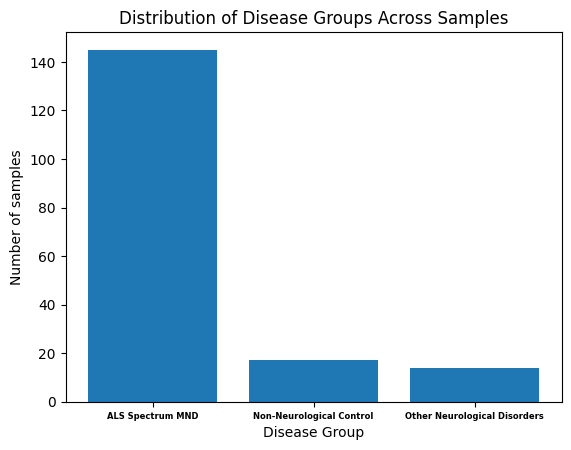

In [84]:
# Bar charts for Disease Group
plt.bar(data_by_disease_grp.index, data_by_disease_grp.values)

# Add titles and labels
plt.title('Distribution of Disease Groups Across Samples')
plt.xlabel('Disease Group')
plt.ylabel('Number of samples')

# Change x labels fonts
plt.xticks(fontweight='bold', fontsize=6)

# Show the chart
plt.show()

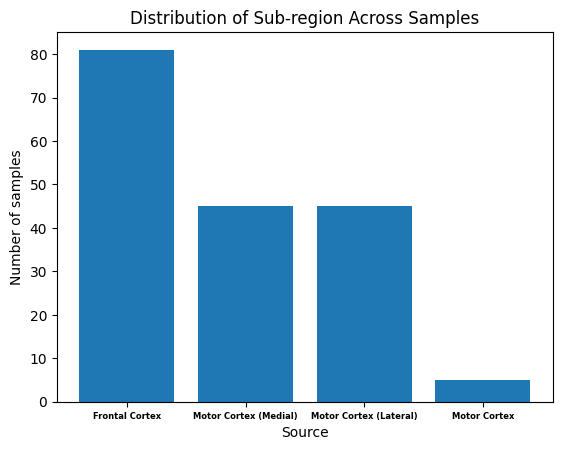

In [118]:
# Bar charts for Sub-region
plt.bar(data_instance.get_data_matrix()['Cns_subregion'].unique(), data_instance.get_data_matrix()['Cns_subregion'].value_counts())

# Add titles and labels
plt.title('Distribution of Sub-region Across Samples')
plt.xlabel('Source')
plt.ylabel('Number of samples')

# Change x labels fonts
plt.xticks(fontweight='bold', fontsize=6)

# Show the chart
plt.show()

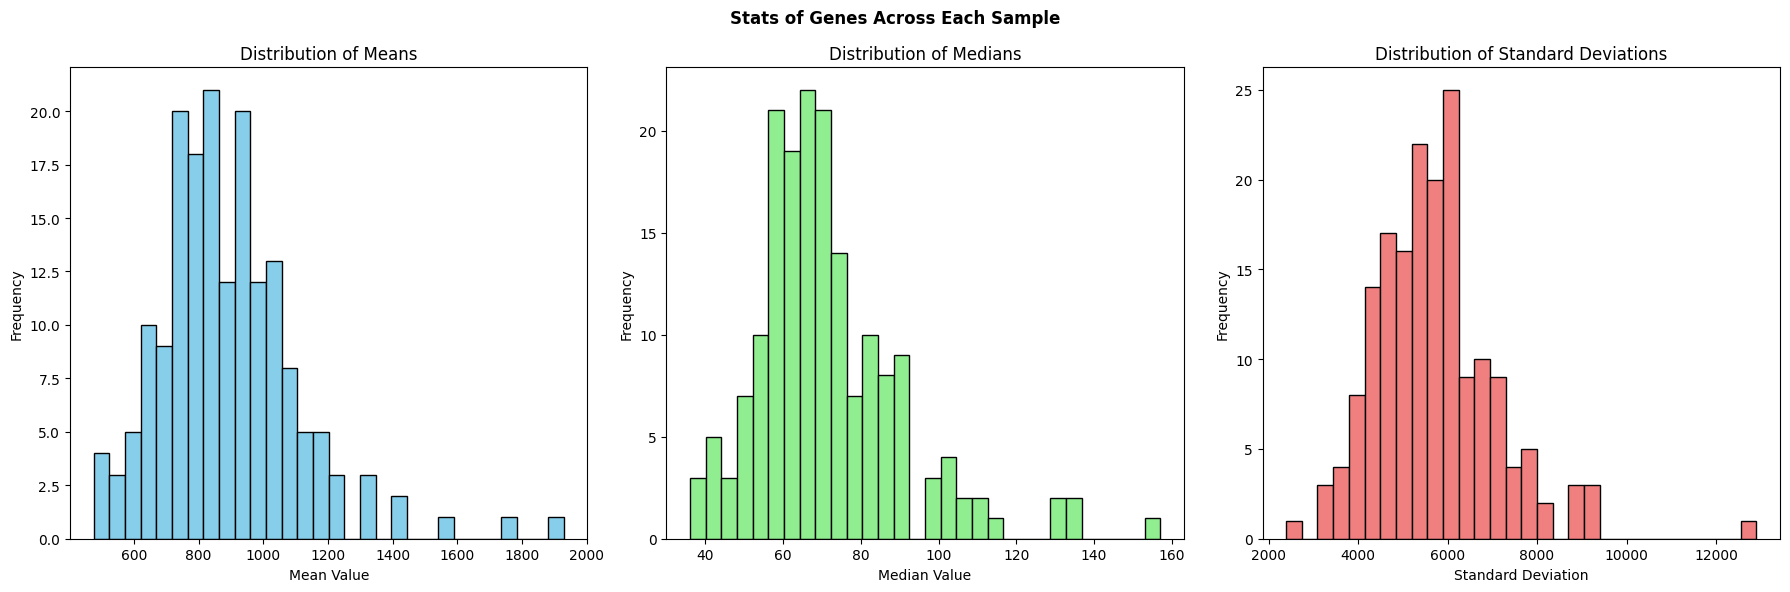

In [124]:
# Histogramms for genes stats
data_for_plots = data_instance.get_data_genes()


means = np.mean(data_for_plots.values, axis=1)
medians = np.median(data_for_plots.values, axis=1)
std_devs = np.std(data_for_plots.values, axis=1)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Histo means
axs[0].hist(means, bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Means')
axs[0].set_xlabel('Mean Value')
axs[0].set_ylabel('Frequency')

# Histo for medians
axs[1].hist(medians, bins=30, color='lightgreen', edgecolor='black')
axs[1].set_title('Distribution of Medians')
axs[1].set_xlabel('Median Value')
axs[1].set_ylabel('Frequency')

# Histo for std deviation
axs[2].hist(std_devs, bins=30, color='lightcoral', edgecolor='black')
axs[2].set_title('Distribution of Standard Deviations')
axs[2].set_xlabel('Standard Deviation')
axs[2].set_ylabel('Frequency')

# Overall title of plot
plt.suptitle('Stats of Genes Across Each Sample', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

In [127]:
means = data_instance.get_data_genes().mean(axis=1)
medians = data_instance.get_data_genes().median(axis=1)
std_devs = data_instance.get_data_genes().std(axis=1)

sample_ids = data_instance.get_data_genes().index

data = {
    'Mean': means,
    'Median':medians,
    'Std_dev': std_devs,
}

sample_stats = pd.DataFrame(data)

print("Dataframe of Samples stats :")
sample_stats

Dataframe of Samples stats :


Mean  Median      Std_dev
Sample_id                                   
GSM3533230  1041.382378    92.0  7144.948717
GSM3533231   881.608503    65.0  6556.784539
GSM3533232   802.592132    58.0  5618.694081
GSM3533233   785.868615    65.0  6617.736421
GSM3533234   906.813525    61.0  6815.130467
...                 ...     ...          ...
GSM3533401   621.179187    51.0  3875.932581
GSM3533402  1412.596518   136.0  7679.231478
GSM3533403  1142.241288   101.0  5264.705168
GSM3533404  1435.251546   132.0  7032.337770
GSM3533405   932.616240    92.0  6028.364664

[176 rows x 3 columns]

#### **Study on an outlier**

In [128]:
sample_stats[sample_stats['Std_dev']==max(sample_stats['Std_dev'].values)] ## We retrieve the max outliers of std values

Mean  Median       Std_dev
Sample_id                                    
GSM3533364  1929.230132   157.0  12904.004636

In [130]:
data_instance.get_data_matrix().loc['GSM3533364'] ## Describe the outliers data

Cns_subregion             Motor Cortex (Medial)
Sample_group                   ALS Spectrum MND
Subject_id                               JHU 83
A1BG                                         58
A1BG-AS1                                    228
                                  ...          
X8_LINE:CR1:LINE                           1180
X9_LINE:L1:LINE                             255
Zaphod2:hAT-Tip100:DNA                      954
Zaphod3:hAT-Tip100:DNA                     3946
Zaphod:hAT-Tip100:DNA                      3902
Name: GSM3533364, Length: 28956, dtype: object

In [141]:
print("The genes with the highest count from the outlier :", data_instance.get_data_genes().loc['GSM3533364'].idxmax(), "; the count :",data_instance.get_data_genes().loc['GSM3533364'].max())
print("The std of the gene with the highest count:", data_instance.get_data_genes()['MIRb:MIR:SINE'].std(),"\nThe Mean of the gene with the highest count:", data_instance.get_data_genes()['MIRb:MIR:SINE'].mean())
print("The patient of origin of the outlier :", c_data.get_data_matrix().loc['GSM3533364']['Subject_id'])

The genes with the highest count from the outlier : MIRb:MIR:SINE ; the count : 884080
The std of the gene with the highest count: 100627.5532686476 
The Mean of the gene with the highest count: 366426.19886363635
The patient of origin of the outlier : JHU 83


In [142]:
## Enumerating every sample of the patient
data_instance.get_data_matrix()[data_instance.get_data_matrix()['Subject_id']=="JHU 83"]

Cns_subregion      Sample_group Subject_id  A1BG  \
Sample_id                                                               
GSM3533363  Motor Cortex (Lateral)  ALS Spectrum MND     JHU 83    19   
GSM3533364   Motor Cortex (Medial)  ALS Spectrum MND     JHU 83    58   
GSM3533365  Motor Cortex (Lateral)  ALS Spectrum MND     JHU 83    32   

            A1BG-AS1  A1CF   A2M  A2M-AS1  A2ML1  A2MP1  ...  \
Sample_id                                                ...   
GSM3533363       125     0  2264       85     93      1  ...   
GSM3533364       228     0  3953      227    260      4  ...   
GSM3533365        91     0  2537       87     84      2  ...   

            X6B_LINE:CR1:LINE  X7A_LINE:CR1:LINE  X7B_LINE:CR1:LINE  \
Sample_id                                                             
GSM3533363                635               1534               1372   
GSM3533364               1824               4240               3761   
GSM3533365                637               1505               1384   

            X7C_LINE:CR1:LINE  X7D_LINE:CR1:LINE  X8_LINE:CR1:LINE  \
Sample_id                                                            
GSM3533363                733                 98               407   
GSM3533364               2046                235              1180   
GSM3533365                724                 90               358   

            X9_LINE:L1:LINE  Zaphod2:hAT-Tip100:DNA  Zaphod3:hAT-Tip100:DNA  \
Sample_id                                                                     
GSM3533363               88                     396                    1369   
GSM3533364              255                     954                    3946   
GSM3533365               65                     348                    1408   

            Zaphod:hAT-Tip100:DNA  
Sample_id                          
GSM3533363                   1486  
GSM3533364                   3902  
GSM3533365                   1409  

[3 rows x 28956 columns]

In [151]:
## Stats of all samples from the patient
outlier_ids = data_instance.get_data_matrix()[data_instance.get_data_matrix()['Subject_id']=="JHU 83"].index.values.tolist()
for id in outlier_ids:
    print("id sample:",id,"; mean:",data_instance.get_data_genes().loc[id].mean(), "; median:",data_instance.get_data_genes().loc[id].median(), "; std:",data_instance.get_data_genes().loc[id].std())

id sample: GSM3533363 ; mean: 736.4009601768383 ; median: 60.0 ; std: 4855.3268535997095
id sample: GSM3533364 ; mean: 1929.230131592581 ; median: 157.0 ; std: 12904.004635996334
id sample: GSM3533365 ; mean: 754.6600006907747 ; median: 65.0 ; std: 4815.672408576015


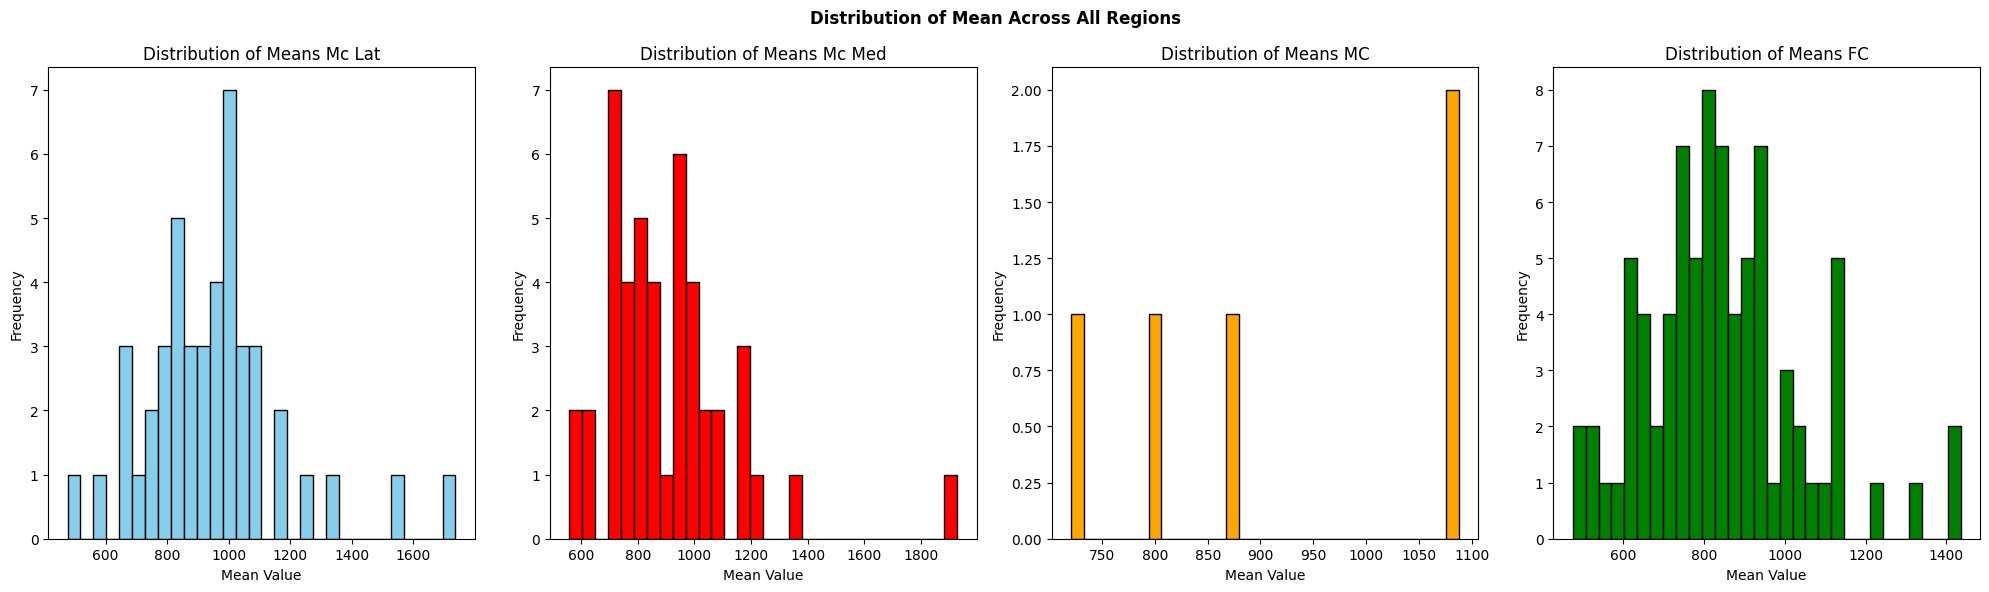

In [153]:
## Distribution of means across all regions 
data_for_distribution = data_instance.get_data_subregion_genes()
data_for_distribution_mc_lat = data_for_distribution[data_for_distribution['Cns_subregion'] == 'Motor Cortex (Lateral)' ]

means_mc_lat = data_for_distribution_mc_lat.mean(axis=1, numeric_only=True)

# ---
data_for_distribution = data_instance.get_data_subregion_genes()
data_for_distribution_mc_med = data_for_distribution[data_for_distribution['Cns_subregion'] == 'Motor Cortex (Medial)' ]

means_mc_med = data_for_distribution_mc_med.mean(axis=1, numeric_only=True)

# ----
data_for_distribution = data_instance.get_data_subregion_genes()
data_for_distribution_mc = data_for_distribution[data_for_distribution['Cns_subregion'] == 'Motor Cortex' ]

means_mc = data_for_distribution_mc.mean(axis=1, numeric_only=True)

# ---d
data_for_distribution = data_instance.get_data_subregion_genes()
data_for_distribution_fc = data_for_distribution[data_for_distribution['Cns_subregion'] == 'Frontal Cortex' ]

means_fc = data_for_distribution_fc.mean(axis=1, numeric_only=True)



fig, axs = plt.subplots(1, 4, figsize=(20, 6))

# Histo means
axs[0].hist(means_mc_lat, bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Means Mc Lat')
axs[0].set_xlabel('Mean Value')
axs[0].set_ylabel('Frequency')


axs[1].hist(means_mc_med, bins=30, color='red', edgecolor='black')
axs[1].set_title('Distribution of Means Mc Med')
axs[1].set_xlabel('Mean Value')
axs[1].set_ylabel('Frequency')


axs[2].hist(means_mc, bins=30, color='orange', edgecolor='black')
axs[2].set_title('Distribution of Means MC')
axs[2].set_xlabel('Mean Value')
axs[2].set_ylabel('Frequency')

axs[3].hist(means_fc, bins=30, color='green', edgecolor='black')
axs[3].set_title('Distribution of Means FC')
axs[3].set_xlabel('Mean Value')
axs[3].set_ylabel('Frequency')

# Overall title of plot
plt.suptitle('Distribution of Mean Across All Regions', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

In [158]:
data_for_mean_study = data_instance.get_data_subregion_genes()
numerical_columns = data.select_dtypes(include=['number']) ## get every column that are numerical value
data.loc[:, 'mean'] = numerical_columns.mean(axis=1) ## add a new column mean that is the mean of each sample count across all genes
data

Cns_subregion  A1BG  A1BG-AS1  A1CF   A2M  A2M-AS1  A2ML1  A2MP1  \
Sample_id                                                                       
GSM3533230  Frontal Cortex    42       149     0  3327      101     78      4   
GSM3533231  Frontal Cortex    25       107     2  1787      153    109      2   
GSM3533232  Frontal Cortex    20        95     0  1830      121    127      1   
GSM3533233  Frontal Cortex    22       101     0  2131      142    143      5   
GSM3533234  Frontal Cortex    22       102     0  1706       83    178      1   
...                    ...   ...       ...   ...   ...      ...    ...    ...   
GSM3533401  Frontal Cortex    23       113     0  2130       72     71      2   
GSM3533402  Frontal Cortex   134       300     0  6077      171     42      8   
GSM3533403  Frontal Cortex    64       290     0  4752      118    174      8   
GSM3533404  Frontal Cortex   124       332     0  3516      141    173      3   
GSM3533405  Frontal Cortex    76       193     0  4278      140    102      2   

            A3GALT2  A4GALT  ...  X7A_LINE:CR1:LINE  X7B_LINE:CR1:LINE  \
Sample_id                    ...                                         
GSM3533230        0      67  ...               2218               2096   
GSM3533231        1      25  ...               2373               2001   
GSM3533232        1      11  ...               2018               1815   
GSM3533233        1      36  ...               2278               2032   
GSM3533234        3      31  ...               2295               1993   
...             ...     ...  ...                ...                ...   
GSM3533401        3      21  ...               1243               1089   
GSM3533402        5     225  ...               1988               1691   
GSM3533403        2     135  ...               1466               1246   
GSM3533404        2     192  ...               1846               1680   
GSM3533405        3     141  ...               1782               1432   

            X7C_LINE:CR1:LINE  X7D_LINE:CR1:LINE  X8_LINE:CR1:LINE  \
Sample_id                                                            
GSM3533230               1120                 84               556   
GSM3533231               1144                118               582   
GSM3533232               1011                 84               571   
GSM3533233               1198                 97               562   
GSM3533234               1152                 96               582   
...                       ...                ...               ...   
GSM3533401                658                 72               320   
GSM3533402                966                119               460   
GSM3533403                726                 61               358   
GSM3533404                936                110               479   
GSM3533405                929                 67               456   

            X9_LINE:L1:LINE  Zaphod2:hAT-Tip100:DNA  Zaphod3:hAT-Tip100:DNA  \
Sample_id                                                                     
GSM3533230              134                     570                    2045   
GSM3533231              153                     552                    2057   
GSM3533232              126                     479                    1659   
GSM3533233              132                     540                    2032   
GSM3533234              124                     539                    1742   
...                     ...                     ...                     ...   
GSM3533401               73                     311                    1102   
GSM3533402              109                     399                    1619   
GSM3533403              107                     347                    1284   
GSM3533404              120                     503                    1646   
GSM3533405              104                     427                    1619   

            Zaphod:hAT-Tip100:DNA         mean  
Sample_i

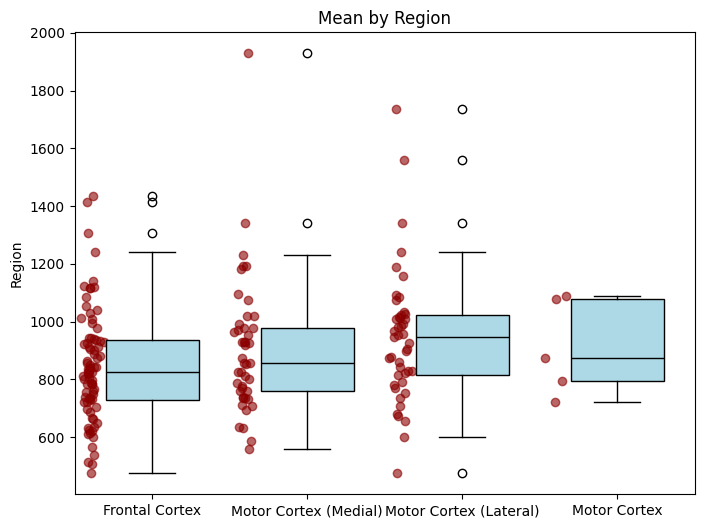

In [159]:
fig, ax = plt.subplots(figsize=(8,6))

# Extraire les données par groupe
groups = [data[data['Cns_subregion'] == region]['mean'] for region in data['Cns_subregion'].unique()]

# Tracer le box plot
box = ax.boxplot(groups, patch_artist=True, widths=0.6,
                 boxprops=dict(facecolor='lightblue', color='black'),
                 medianprops=dict(color='black'),
                 whiskerprops=dict(color='black'),
                 capprops=dict(color='black'))

# Ajout des points individuels (jitter)
for i, group in enumerate(groups, 1):
    x = np.random.normal(i - 0.4, 0.03, size=len(group))  # Ajout d'un léger décalage
    ax.scatter(x, group, color='darkred', alpha=0.6)

# Ajout des labels
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(data['Cns_subregion'].unique())
ax.set_ylabel('Region')
ax.set_title('Mean by Region')

# Affichage
plt.show()

In [49]:
def find_outliers(df, column, groupby_col=None):
    if groupby_col!=None:
        outliers = []
        for region, group in df.groupby(groupby_col):
            Q1 = group[column].quantile(0.25)
            Q3 = group[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Find outliers
            outlier_values = group[(group[column] < lower_bound) | (group[column] > upper_bound)]
            outliers.append(outlier_values)
        
        return pd.concat(outliers)
    else:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers for the entire dataset
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        return outliers

In [50]:
outliers_df = find_outliers(data, 'mean', 'Cns_subregion')
outliers_df

Cns_subregion  A1BG  A1BG-AS1  A1CF   A2M  A2M-AS1  \
Sample_id                                                                 
GSM3533343          Frontal Cortex    56       219     6  4688      150   
GSM3533402          Frontal Cortex   134       300     0  6077      171   
GSM3533404          Frontal Cortex   124       332     0  3516      141   
GSM3533276  Motor Cortex (Lateral)    78       120     0  6849      158   
GSM3533302  Motor Cortex (Lateral)    63       292     2  4053      207   
GSM3533307  Motor Cortex (Lateral)    18        69     0   946       55   
GSM3533361  Motor Cortex (Lateral)    92       341     0  2660      163   
GSM3533293   Motor Cortex (Medial)    38       166     0  5970      190   
GSM3533364   Motor Cortex (Medial)    58       228     0  3953      227   

            A2ML1  A2MP1  A3GALT2  A4GALT  ...  X7A_LINE:CR1:LINE  \
Sample_id                                  ...                      
GSM3533343    129      2        4      40  ...               2134   
GSM3533402     42      8        5     225  ...               1988   
GSM3533404    173      3        2     192  ...               1846   
GSM3533276     76      5        1      57  ...               2064   
GSM3533302    293      5        4      42  ...               2959   
GSM3533307     74      0        4       4  ...               1401   
GSM3533361    288      0       11      78  ...               2785   
GSM3533293    153      0        0     129  ...               1951   
GSM3533364    260      4        5      83  ...               4240   

            X7B_LINE:CR1:LINE  X7C_LINE:CR1:LINE  X7D_LINE:CR1:LINE  \
Sample_id                                                             
GSM3533343               1901               1023                 84   
GSM3533402               1691                966                119   
GSM3533404               1680                936                110   
GSM3533276               1979                948                131   
GSM3533302               2836               1516                152   
GSM3533307               1148                703                 56   
GSM3533361               2520               1308                123   
GSM3533293               1968                976                101   
GSM3533364               3761               2046                235   

            X8_LINE:CR1:LINE  X9_LINE:L1:LINE  Zaphod2:hAT-Tip100:DNA  \
Sample_id                                                               
GSM3533343               533              132                     563   
GSM3533402               460              109                     399   
GSM3533404               479              120                     503   
GSM3533276               446              100                     464   
GSM3533302               725              206                     754   
GSM3533307               410               81                     334   
GSM3533361               632              163                     655   
GSM3533293               466              129                     549   
GSM3533364              1180              255                     954   

            Zaphod3:hAT-Tip100:DNA  Zaphod:hAT-Tip100:DNA         mean  
Sample_id                                                               
GSM3533343                    1751                   2131  1308.257210  
GSM3533402                    1619                   1724  1412.596518  
GSM3533404                    1646                   1839  1435.251546  
GSM3533276                    1776                   2084  1340.550547  
GSM3533302                    2652                   3049  1736.451145  
GSM3533307                    1213                   1210   476.158326  
GSM3533361                    2479                   2930  1560.718302  
GSM3533293                    1618                   2049  1342.107726  
GSM3533364                    3946                   3902  1929.230132  

[9 rows x 28955 columns]

### **- Stats regarding Genes**

In [54]:
data_by_disease_grp

Sample_group
ALS Spectrum MND                145
Non-Neurological Control         17
Other Neurological Disorders     14
Name: count, dtype: int64

In [55]:
data_instance.get_data_matrix()

Cns_subregion      Sample_group   Subject_id  A1BG  A1BG-AS1  \
Sample_id                                                                   
GSM3533230  Frontal Cortex  ALS Spectrum MND  NEUEL133AK6    42       149   
GSM3533231  Frontal Cortex  ALS Spectrum MND  NEUYV496XLP    25       107   
GSM3533232  Frontal Cortex  ALS Spectrum MND  NEUZU200WEQ    20        95   
GSM3533233  Frontal Cortex  ALS Spectrum MND  NEUME287RK2    22       101   
GSM3533234  Frontal Cortex  ALS Spectrum MND  NEUEC006FND    22       102   
...                    ...               ...          ...   ...       ...   
GSM3533401  Frontal Cortex  ALS Spectrum MND  NEUMY028JH4    23       113   
GSM3533402  Frontal Cortex  ALS Spectrum MND  NEUXR145UBL   134       300   
GSM3533403  Frontal Cortex  ALS Spectrum MND  NEUKN209FNW    64       290   
GSM3533404  Frontal Cortex  ALS Spectrum MND  NEUUF289NRL   124       332   
GSM3533405  Frontal Cortex  ALS Spectrum MND  NEUPU334DL1    76       193   

            A1CF   A2M  A2M-AS1  A2ML1  A2MP1  ...  X6B_LINE:CR1:LINE  \
Sample_id                                      ...                      
GSM3533230     0  3327      101     78      4  ...                986   
GSM3533231     2  1787      153    109      2  ...               1216   
GSM3533232     0  1830      121    127      1  ...                905   
GSM3533233     0  2131      142    143      5  ...                935   
GSM3533234     0  1706       83    178      1  ...                966   
...          ...   ...      ...    ...    ...  ...                ...   
GSM3533401     0  2130       72     71      2  ...                553   
GSM3533402     0  6077      171     42      8  ...                719   
GSM3533403     0  4752      118    174      8  ...                623   
GSM3533404     0  3516      141    173      3  ...                743   
GSM3533405     0  4278      140    102      2  ...                695   

            X7A_LINE:CR1:LINE  X7B_LINE:CR1:LINE  X7C_LINE:CR1:LINE  \
Sample_id                                                             
GSM3533230               2218               2096               1120   
GSM3533231               2373               2001               1144   
GSM3533232               2018               1815               1011   
GSM3533233               2278               2032               1198   
GSM3533234               2295               1993               1152   
...                       ...                ...                ...   
GSM3533401               1243               1089                658   
GSM3533402               1988               1691                966   
GSM3533403               1466               1246                726   
GSM3533404               1846               1680                936   
GSM3533405               1782               1432                929   

            X7D_LINE:CR1:LINE  X8_LINE:CR1:LINE  X9_LINE:L1:LINE  \
Sample_id                                                          
GSM3533230                 84               556              134   
GSM3533231                118               582              153   
GSM3533232                 84               571              126   
GSM3533233                 97               562              132   
GSM3533234                 96               582              124   
...                       ...               ...              ...   
GSM3533401                 72               320               73   
GSM3533402                119               460              109   
GSM3533403                 61               358              107   
GSM3533404                110               479              120   
GSM3533405                 67               456              104   

            Zaphod2:hAT-Tip100:DNA  Zaphod3:hAT-Tip100:DNA  \
Sample_id                                                    
GSM3533230                     570                    2045   
GSM3533231                     552                    2057   
GSM3

In [160]:
len(list_all_genes), len(data_instance.get_data_matrix().columns)

(28953, 28956)

#### **Genes statistics**

In [163]:
df = data_instance.get_mrn_data_genes()
gene_stats = pd.DataFrame({
    'Mean': df.mean(axis=0),
    'Median': df.median(axis=0),
    'Std': df.std(axis=0)
})

gene_stats 

Mean     Median        Std
A1BG                    56.316908  50.306072  30.348211
A1BG-AS1                51.694939  47.305278  20.987782
A1CF                     0.000000   0.000000   0.000000
A2M                     54.841302  51.068853  28.551922
A2M-AS1                 51.962135  47.874708  18.012035
...                           ...        ...        ...
X8_LINE:CR1:LINE        49.137072  47.581360  13.716520
X9_LINE:L1:LINE         49.723518  47.990636  15.068840
Zaphod2:hAT-Tip100:DNA  50.867955  50.081351  14.966822
Zaphod3:hAT-Tip100:DNA  47.868213  48.079589  14.231457
Zaphod:hAT-Tip100:DNA   49.271635  49.199048  13.936847

[28953 rows x 3 columns]

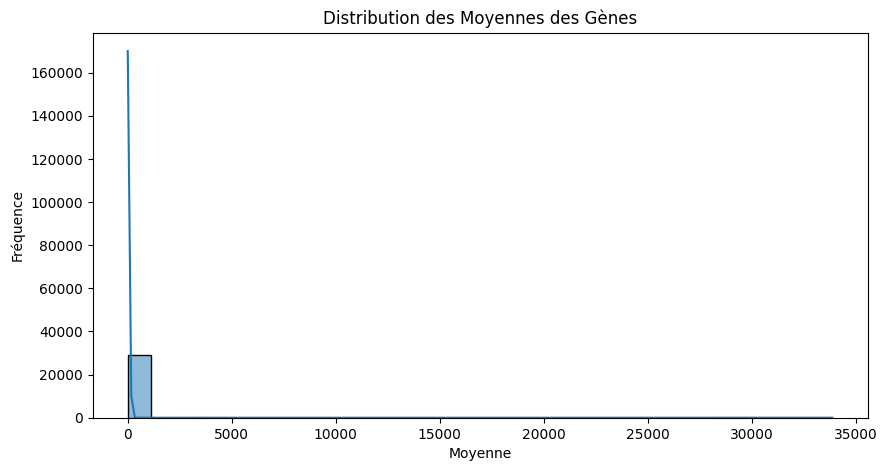

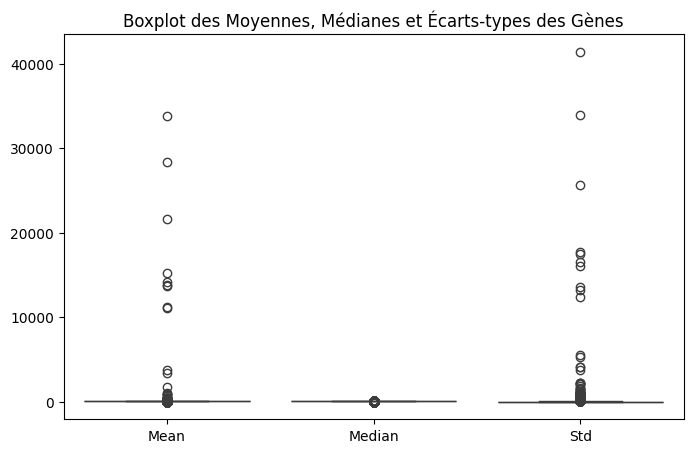

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme des moyennes
plt.figure(figsize=(10,5))
sns.histplot(gene_stats['Mean'], bins=30, kde=True)
plt.title("Distribution des Moyennes des Gènes")
plt.xlabel("Moyenne")
plt.ylabel("Fréquence")
plt.show()

# Boxplot des valeurs
plt.figure(figsize=(8,5))
sns.boxplot(data=gene_stats)
plt.title("Boxplot des Moyennes, Médianes et Écarts-types des Gènes")
plt.show()


We can see that most of the genes have a mean between 0 and 50000, a few are between 50k and 150k. Some outsiders are also present.

In [60]:
# Display most variable genes
gene_stats_sorted = gene_stats.sort_values(by="Std", ascending=False)
print(gene_stats_sorted.head(10))  # Top 10 most variable genes

                Mean     Median           Std
DDX3Y   33869.112536  39.257416  41423.043353
USP9Y   28341.659163  48.489510  33906.392593
KDM5D   21641.659668  47.103328  25625.263180
TTTY15  15230.359670  48.056496  17738.821636
RPS4Y1  14177.092324  40.680322  17538.232785
TTTY14  13878.337085  68.879006  16491.336491
UTY     13708.018405  41.913263  16085.037513
ZFY     11154.803597  50.809944  13585.196087
TXLNGY  11245.763418  44.442671  13223.983507
DLK1      988.253208  49.230842  12342.021876


Separation des echantillons entre malades et pas malades

In [61]:
df_als = c_data.get_data_als()
df_control = c_data.get_data_control()

In [62]:
# Compute descriptive statistics for ALS and Control separately
als_stats = df_als.describe().T
control_stats = df_control.describe().T

# Add a column to show difference in mean expression
als_stats["Control_Mean"] = control_stats["mean"]
als_stats["Diff_Mean"] = als_stats["mean"] - als_stats["Control_Mean"]

# Show top differentially expressed genes
als_stats_sorted = als_stats.sort_values(by="Diff_Mean", ascending=False)
print(als_stats_sorted.head(10))  # Genes with largest mean difference

als_stats

        count          mean           std  min        25%        50%  \
DDX3Y   145.0  33251.772645  40092.272812  0.0   0.000000  40.428535   
KDM5D   145.0  26496.719088  31998.447895  0.0   0.000000  38.647490   
USP9Y   145.0  29654.844333  35870.370570  0.0   0.000000  51.636607   
RPS4Y1  145.0  14383.628747  17810.946603  0.0   0.000000  41.408584   
UTY     145.0  14856.245615  17563.923923  0.0   0.000000  46.126541   
TXLNGY  145.0  11401.500090  13512.687490  0.0   0.000000  45.908681   
GSTM1   145.0   5975.336240   9532.576050  0.0   0.000000  47.185696   
PRKY    145.0   3648.840287   4588.223154  0.0   0.000000  47.493882   
NPAS4   145.0    849.546920   4546.185332  0.0  18.789552  56.368656   
NLGN4Y  145.0   1953.147934   2337.301092  0.0   0.000000  53.201353   

                 75%            max  Control_Mean     Diff_Mean  
DDX3Y   67111.367397  146068.295425   3954.804738  29296.967907  
KDM5D   53720.010985  135420.804671   7195.116042  19301.603045  
USP9Y   6

count       mean        std        min        25%  \
Cns_subregion           145.0   0.000000   0.000000   0.000000   0.000000   
Sample_group            145.0   0.000000   0.000000   0.000000   0.000000   
Subject_id              145.0   0.000000   0.000000   0.000000   0.000000   
A1BG                    145.0  56.096376  30.216500  14.875593  37.188984   
A1BG-AS1                145.0  51.789449  22.291447  16.919083  38.610216   
...                       ...        ...        ...        ...        ...   
X8_LINE:CR1:LINE        145.0  49.222625  14.001515  19.115618  40.580642   
X9_LINE:L1:LINE         145.0  49.845315  14.842325  20.578624  39.367803   
Zaphod2:hAT-Tip100:DNA  145.0  51.108445  15.593327  16.631329  40.233141   
Zaphod3:hAT-Tip100:DNA  145.0  47.809945  14.663124  18.890494  37.934819   
Zaphod:hAT-Tip100:DNA   145.0  49.396235  14.320636  20.562314  40.072338   

                              50%        75%         max  Control_Mean  \
Cns_subregion            0.000000   0.000000    0.000000      0.000000   
Sample_group             0.000000   0.000000    0.000000      0.000000   
Subject_id               0.000000   0.000000    0.000000      0.000000   
A1BG                    49.089458  63.965052  199.332952     54.696215   
A1BG-AS1                47.286669  61.168994  147.933524     50.616307   
...                           ...        ...         ...           ...   
X8_LINE:CR1:LINE        47.628859  56.172152  126.013573     48.298423   
X9_LINE:L1:LINE         47.867669  58.604342  114.077155     49.542197   
Zaphod2:hAT-Tip100:DNA  50.750011  59.310254  116.663881     48.178291   
Zaphod3:hAT-Tip100:DNA  47.380066  54.948570  121.403728     48.075894   
Zaphod:hAT-Tip100:DNA   49.258545  56.482373  110.973927     48.268363   

                        Diff_Mean  
Cns_subregion            0.000000  
Sample_group             0.000000  
Subject_id               0.000000  
A1BG                     1.400161  
A1BG-AS1                 1.173141  
...                           ...  
X8_LINE:CR1:LINE         0.924202  
X9_LINE:L1:LINE          0.303118  
Zaphod2:hAT-Tip100:DNA   2.930154  
Zaphod3:hAT-Tip100:DNA  -0.265948  
Zaphod:hAT-Tip100:DNA    1.127872  

[28956 rows x 10 columns]

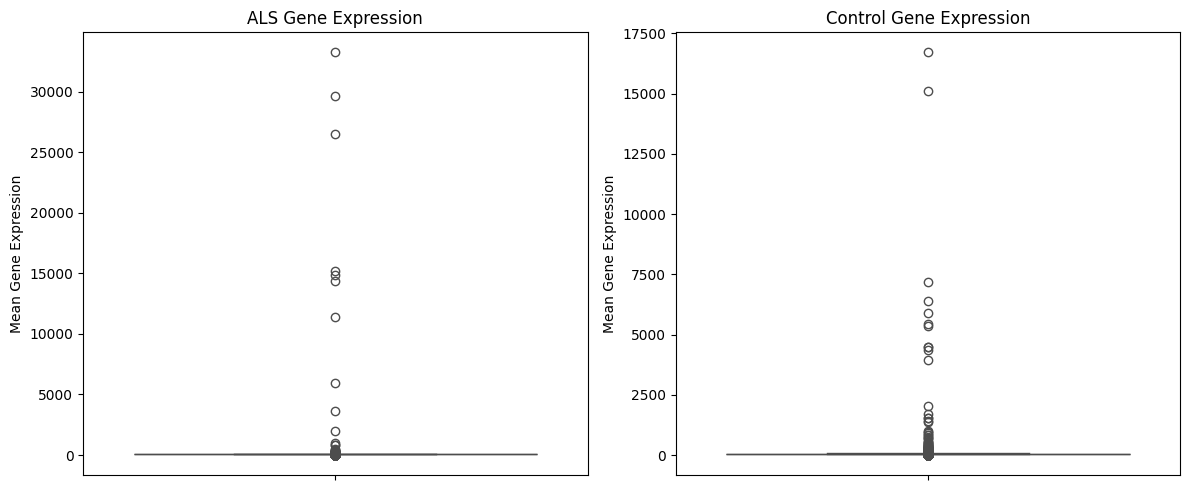

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


sns.boxplot(data=als_stats["mean"], color="red", ax=axes[0])
axes[0].set_title("ALS Gene Expression")
axes[0].set_ylabel("Mean Gene Expression")

sns.boxplot(data=control_stats["mean"], color="blue", ax=axes[1])
axes[1].set_title("Control Gene Expression")
axes[1].set_ylabel("Mean Gene Expression")

plt.tight_layout()
plt.show()

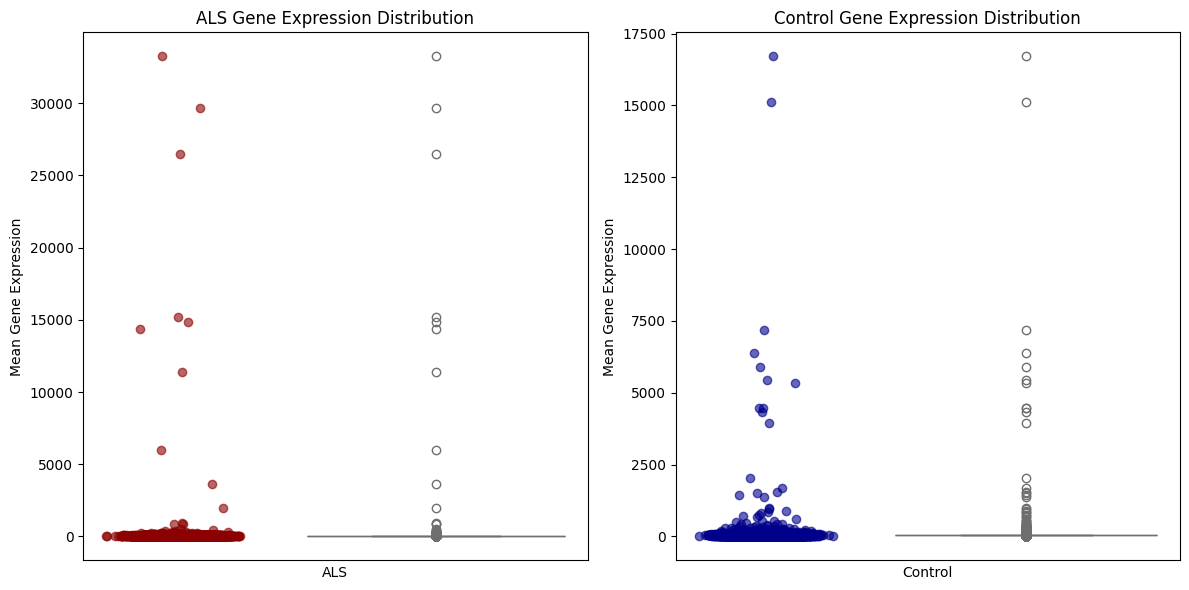

In [64]:
# Create a figure with 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First Boxplot: ALS
sns.boxplot(data=als_stats["mean"], color="skyblue", ax=axes[0])

# Add jittered points for ALS
x_als = np.random.normal(-0.8, 0.05, size=len(als_stats["mean"]))  
axes[0].scatter(x_als, als_stats["mean"], color="darkred", alpha=0.6)

# Set labels and title for ALS
axes[0].set_xticks([])
axes[0].set_xlabel("ALS")
axes[0].set_ylabel("Mean Gene Expression")
axes[0].set_title("ALS Gene Expression Distribution")

# Second Boxplot: Control
sns.boxplot(data=control_stats["mean"], color="lightcoral", ax=axes[1])

# Add jittered points for Control
x_control = np.random.normal(-0.8 , 0.05, size=len(control_stats["mean"]))  
axes[1].scatter(x_control, control_stats["mean"], color="darkblue", alpha=0.6)

# Set labels and title for Control
axes[1].set_xticks([])
axes[1].set_xlabel("Control")
axes[1].set_ylabel("Mean Gene Expression")
axes[1].set_title("Control Gene Expression Distribution")

# Adjust layout for better spacing
plt.tight_layout()

# Show the figure
plt.show()

In [65]:
mean_als_outliers = find_outliers(als_stats, "mean")
mean_control_outliers = find_outliers(control_stats, "mean")

als_stats_no_outliers = als_stats.drop(mean_als_outliers.index)
control_stats_no_outliers = control_stats.drop(mean_control_outliers.index)


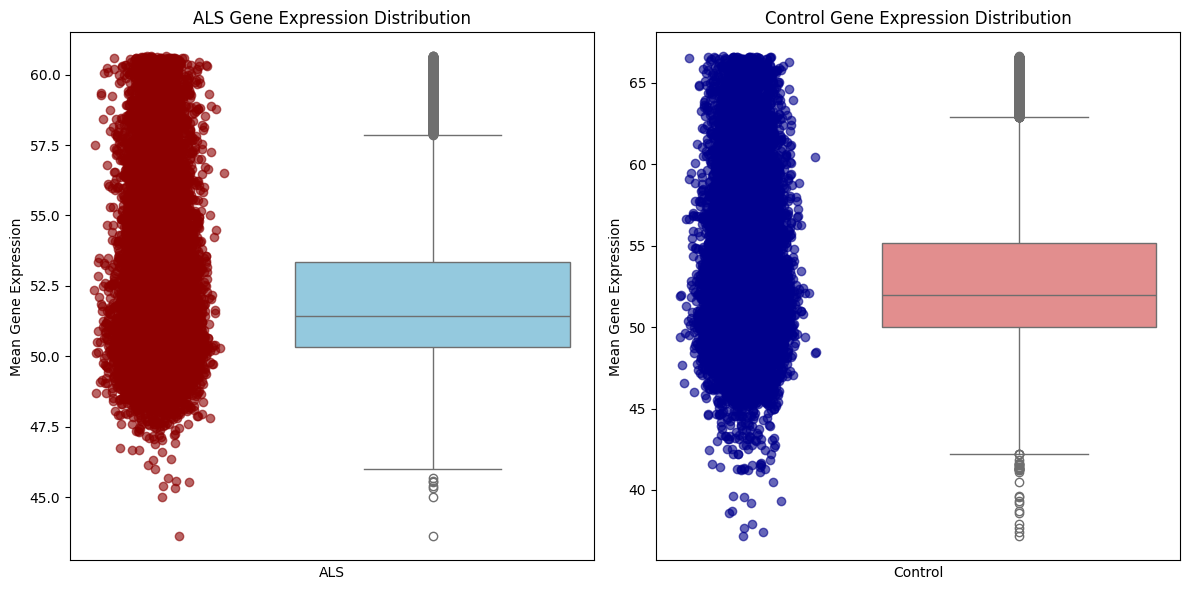

In [66]:
# Create a figure with 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First Boxplot: ALS
sns.boxplot(data=als_stats_no_outliers["mean"], color="skyblue", ax=axes[0])

# Add jittered points for ALS
x_als = np.random.normal(-0.8, 0.05, size=len(als_stats_no_outliers["mean"]))  
axes[0].scatter(x_als, als_stats_no_outliers["mean"], color="darkred", alpha=0.6)

# Set labels and title for ALS
axes[0].set_xticks([])
axes[0].set_xlabel("ALS")
axes[0].set_ylabel("Mean Gene Expression")
axes[0].set_title("ALS Gene Expression Distribution")

# Second Boxplot: Control
sns.boxplot(data=control_stats_no_outliers["mean"], color="lightcoral", ax=axes[1])

# Add jittered points for Control
x_control = np.random.normal(-0.8 , 0.05, size=len(control_stats_no_outliers["mean"]))  
axes[1].scatter(x_control, control_stats_no_outliers["mean"], color="darkblue", alpha=0.6)

# Set labels and title for Control
axes[1].set_xticks([])
axes[1].set_xlabel("Control")
axes[1].set_ylabel("Mean Gene Expression")
axes[1].set_title("Control Gene Expression Distribution")

# Adjust layout for better spacing
plt.tight_layout()

# Show the figure
plt.show()

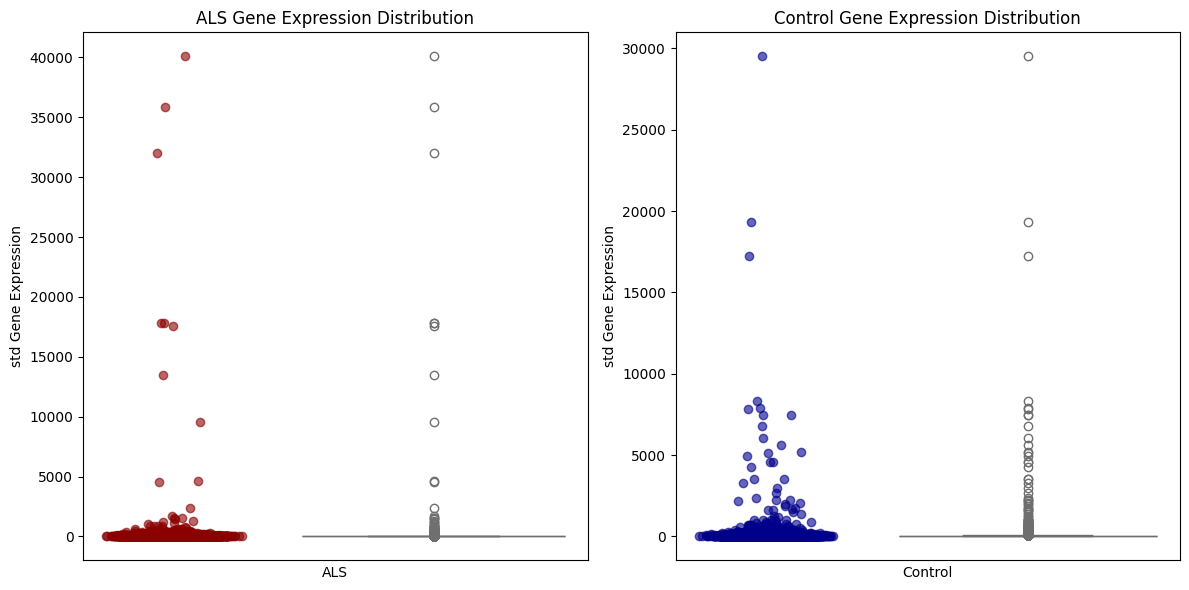

In [67]:
# Create a figure with 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First Boxplot: ALS
sns.boxplot(data=als_stats["std"], color="skyblue", ax=axes[0])

# Add jittered points for ALS
x_als = np.random.normal(-0.8, 0.05, size=len(als_stats["std"]))  
axes[0].scatter(x_als, als_stats["std"], color="darkred", alpha=0.6)

# Set labels and title for ALS
axes[0].set_xticks([])
axes[0].set_xlabel("ALS")
axes[0].set_ylabel("std Gene Expression")
axes[0].set_title("ALS Gene Expression Distribution")

# Second Boxplot: Control
sns.boxplot(data=control_stats["std"], color="lightcoral", ax=axes[1])

# Add jittered points for Control
x_control = np.random.normal(-0.8 , 0.05, size=len(control_stats["std"]))  
axes[1].scatter(x_control, control_stats["std"], color="darkblue", alpha=0.6)

# Set labels and title for Control
axes[1].set_xticks([])
axes[1].set_xlabel("Control")
axes[1].set_ylabel("std Gene Expression")
axes[1].set_title("Control Gene Expression Distribution")

# Adjust layout for better spacing
plt.tight_layout()

# Show the figure
plt.show()


Clairement y a un problème

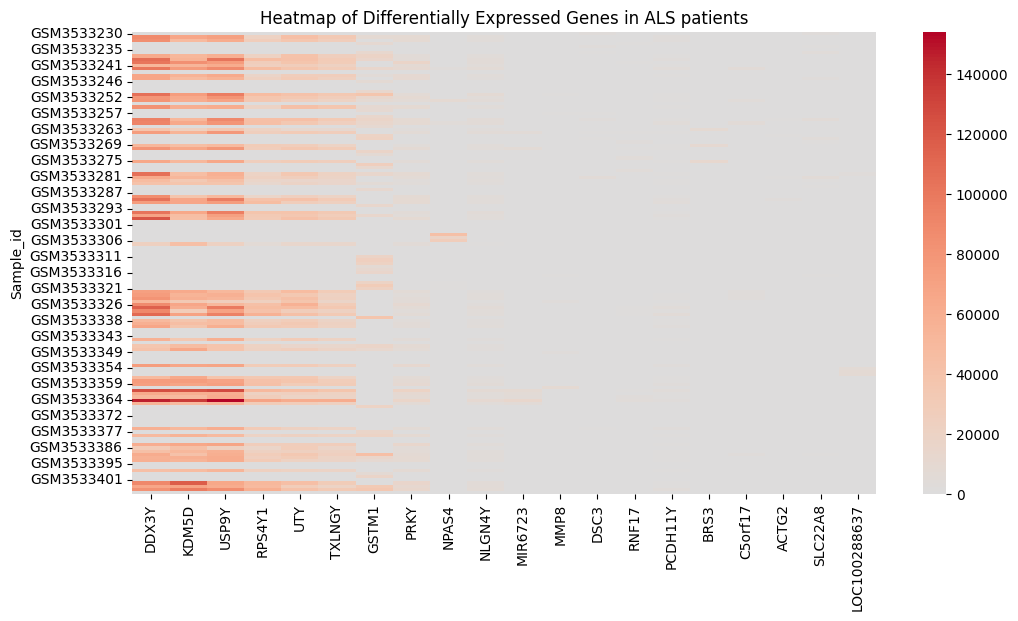

In [68]:
top_genes = als_stats_sorted.head(20).index  # Select top 20 DEGs
df_subset = c_data.get_data_als()[top_genes]  # Extract relevant genes

plt.figure(figsize=(12,6))
sns.heatmap(df_subset, cmap="coolwarm", center=0)
plt.title("Heatmap of Differentially Expressed Genes in ALS patients")
plt.show()


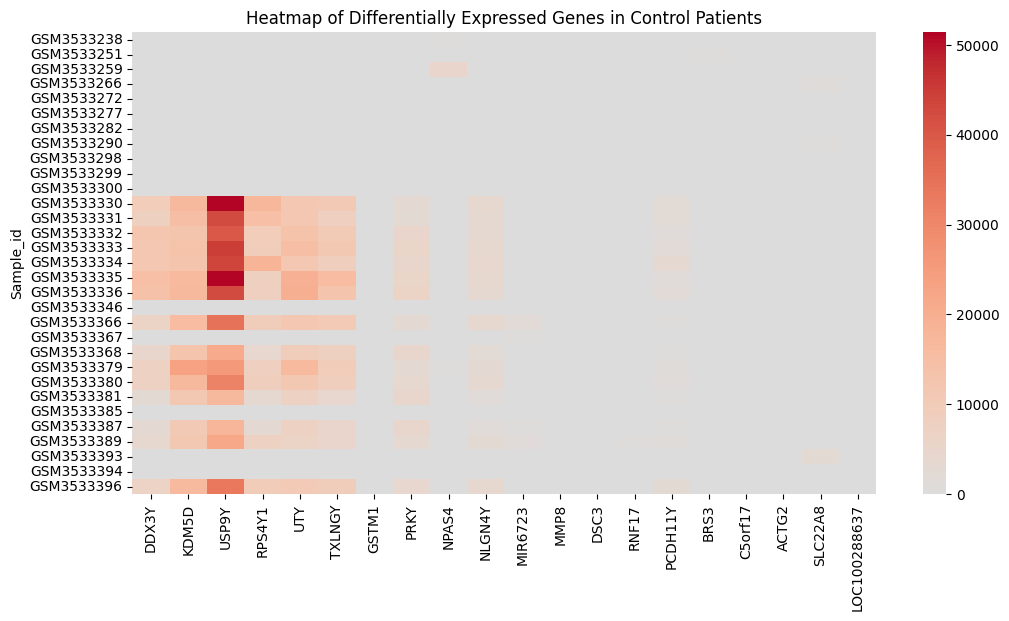

In [69]:
top_genes = als_stats_sorted.head(20).index  # Select top 20 DEGs
df_subset = c_data.get_data_control()[top_genes]  # Extract relevant genes

plt.figure(figsize=(12,6))
sns.heatmap(df_subset, cmap="coolwarm", center=0)
plt.title("Heatmap of Differentially Expressed Genes in Control Patients")
plt.show()

### Data transformation

In [70]:
df = c_data.get_data_genes_normalized()
df_log = np.log2(df + 1)

In [71]:
df_als_log = np.log2(df_als + 1)

In [72]:
df_control_log = np.log2(df_control + 1)

Text(0.5, 1.0, 'Log-Transformed Genes Distribution')

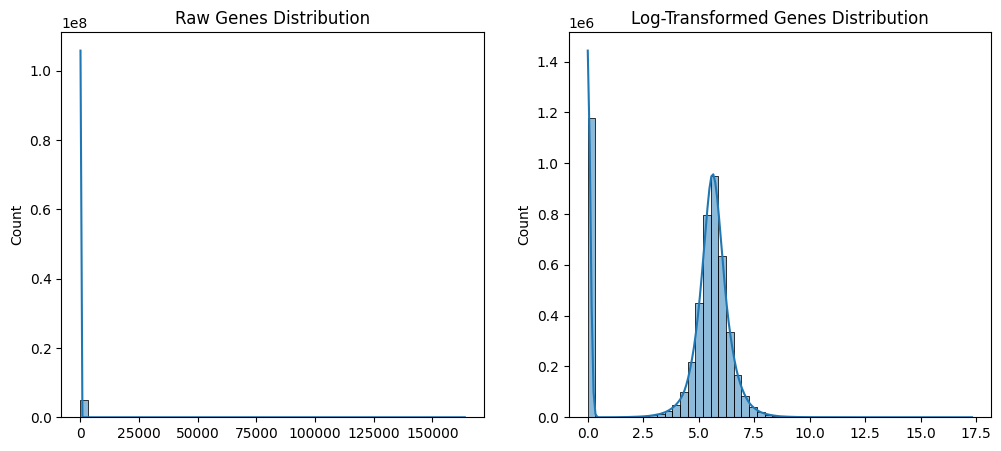

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df.values.flatten(), bins=50, kde=True, ax=axes[0])
axes[0].set_title("Raw Genes Distribution")

sns.histplot(df_log.values.flatten(), bins=50, kde=True, ax=axes[1])
axes[1].set_title("Log-Transformed Genes Distribution")

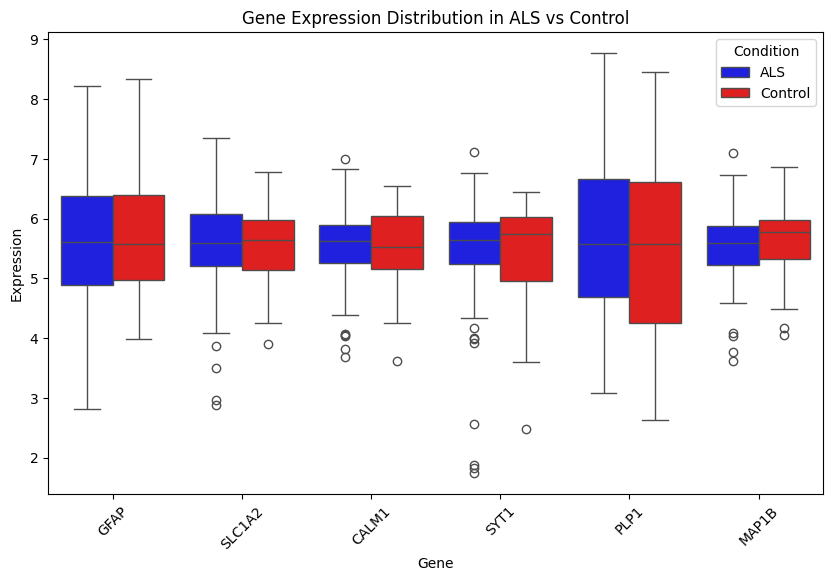

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selection of a few genes for visualization
selected_genes = ["GFAP", "SLC1A2", "CALM1", "SYT1", "PLP1", "MAP1B"]  # Replace with actual gene names

df_als_log["Condition"] = "ALS"
df_control_log["Condition"] = "Control"

df_combined = pd.concat([df_als_log, df_control_log])

# Convert data to long format for seaborn
df_long = df_combined.melt(id_vars=["Condition"], value_vars=selected_genes, var_name="Gene", value_name="Expression")

plt.figure(figsize=(10, 6))
sns.boxplot(x="Gene", y="Expression", hue="Condition", data=df_long, palette=["blue", "red"])
plt.title("Gene Expression Distribution in ALS vs Control")
plt.xticks(rotation=45)
plt.show()


On peut pas vraiment voir de grosse differences entre control et als là ?

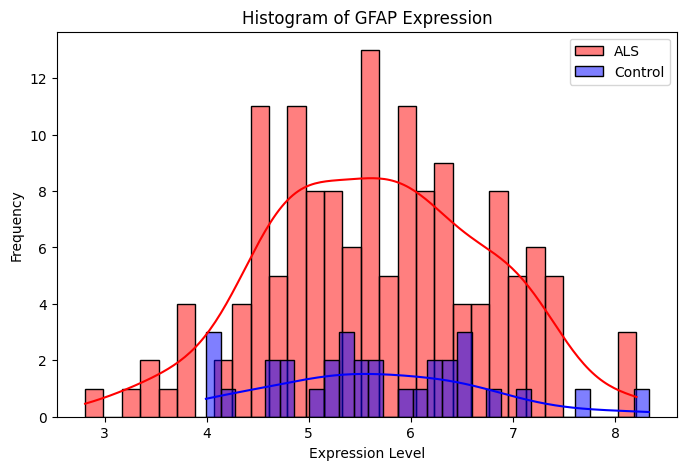

In [75]:
gene_of_interest = "GFAP"  # Replace with actual gene name

plt.figure(figsize=(8, 5))
sns.histplot(df_als_log[gene_of_interest], color="red", label="ALS", kde=True, bins=30)
sns.histplot(df_control_log[gene_of_interest], color="blue", label="Control", kde=True, bins=30)
plt.title(f"Histogram of {gene_of_interest} Expression")
plt.xlabel("Expression Level")
plt.ylabel("Frequency")
plt.legend()
plt.show()

On voit une vraie diff entre control et als là pour le coup

/tmp/ipykernel_9808/3117973073.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heatmap_als["Condition"] = ["ALS"] * len(df_als_log)
/tmp/ipykernel_9808/3117973073.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heatmap_control["Condition"] =  ["Control"] * len(df_control_log)


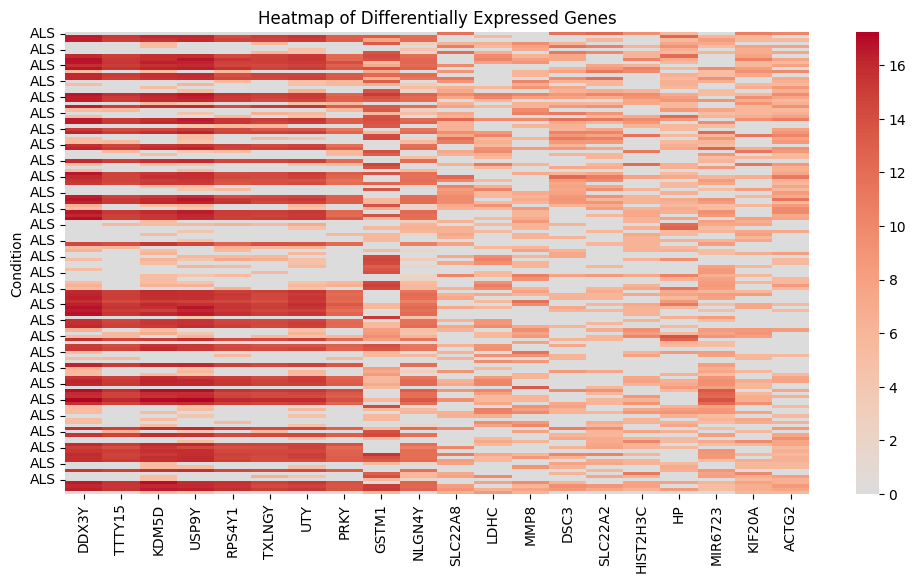

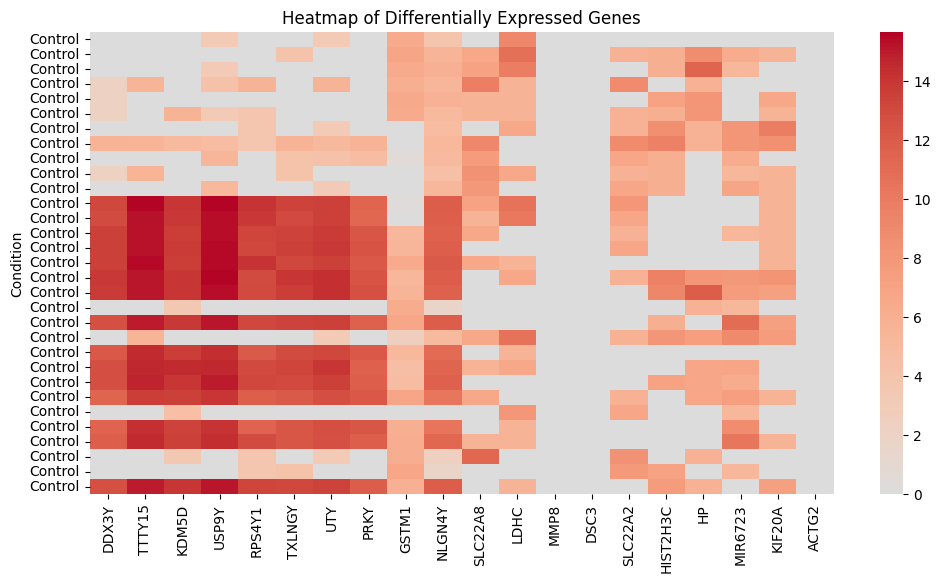

In [76]:
df_als_log = np.log2(df_als + 1)
df_control_log = np.log2(df_control + 1)
# Compute the standard deviation for each gene
std_als = df_als_log.std()
std_control = df_control_log.std()

# Select the top 20 most variable genes
top_variable_genes = std_als.nlargest(20).index  # Get top 20 variable genes in ALS

# Combine ALS and Control data for selected genes
df_heatmap_als = df_als_log[top_variable_genes]
df_heatmap_control = df_control_log[top_variable_genes]

# Add condition labels
df_heatmap_als["Condition"] = ["ALS"] * len(df_als_log) 
df_heatmap_als = df_heatmap_als.set_index("Condition")

df_heatmap_control["Condition"] =  ["Control"] * len(df_control_log)
df_heatmap_control = df_heatmap_control.set_index("Condition")

# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap_als, cmap="coolwarm", center=0)
plt.title("Heatmap of Differentially Expressed Genes")
plt.show()


plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap_control, cmap="coolwarm", center=0)
plt.title("Heatmap of Differentially Expressed Genes")
plt.show()

Truc chelou avec XIST, à regarder plus precisement

In [77]:
def heatmap_comparison(set_of_genes, df1, df2):
    # Extract relevant genes
    df1_subset = df1[set_of_genes]  
    df2_subset = df2[set_of_genes]

    # Create a figure with 2 subplots (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Plot ALS heatmap
    sns.heatmap(df1_subset, cmap="coolwarm", center=0, ax=axes[0])
    axes[0].set_title("ALS Patients")

    # Plot Control heatmap
    sns.heatmap(df2_subset, cmap="coolwarm", center=0, ax=axes[1])
    axes[1].set_title("Control Patients")

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

In [78]:
for i in tqdm(range(0, len(als_stats), 20)) :
    subset_genes = als_stats.iloc[i:i+20].index
    #heatmap_comparison(subset_genes, c_data.get_data_als(), c_data.get_data_control())

  0%|          | 0/1448 [00:00<?, ?it/s]

100%|██████████| 1448/1448 [00:00<00:00, 4276.17it/s]


## Step 3

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
my_data = c_data.get_data_genes_normalized()
my_data = my_data.loc[:, my_data.var() > 0]
X = scaler.fit_transform(my_data) # my_data being your dataframe containing your genes in column and samples in row

In [80]:
X

array([[ 0.19251575,  0.63398434,  0.68375795, ...,  1.2625332 ,
         1.06112223,  1.45131029],
       [-0.63866337, -0.24099928, -0.52435513, ...,  1.11502969,
         1.08714238,  1.1101587 ],
       [-0.88312782, -0.4909946 , -0.4906221 , ...,  0.51682101,
         0.22414049,  0.08670394],
       ...,
       [ 1.26815933,  3.57142936,  1.80165479, ..., -0.5648714 ,
        -0.58898943, -0.54452863],
       [ 4.20173273,  4.44641298,  0.83202637, ...,  0.71349236,
         0.19595199,  0.2113162 ],
       [ 1.85487401,  1.55063385,  1.429807  , ...,  0.09069976,
         0.13740664,  0.0315477 ]])

In [81]:
components = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"]

In [82]:
pca = PCA(n_components=10)  # Reduce to 10 principal components
principal_components = pca.fit_transform(X)

# Convert to DataFrame
df_pca = pd.DataFrame(principal_components, columns=components, index=my_data.index)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

Explained Variance Ratios: [0.36046468 0.10176639 0.09169767 0.05664559 0.03088848 0.02800851
 0.01980053 0.01819644 0.01305778 0.01017242]


In [83]:
df_pca

PC1        PC2         PC3        PC4        PC5  \
Sample_id                                                             
GSM3533230   62.189174 -12.897833   11.867563 -56.248413  73.216346   
GSM3533231  -27.252140   1.192609  -13.358047 -42.324446 -16.980914   
GSM3533232  -54.085294  15.836061  -33.928655 -30.355929 -12.881990   
GSM3533233  -60.384630 -14.240843   30.185720 -52.233838 -18.956425   
GSM3533234  -19.105174 -20.943224  -44.124193 -61.532352 -11.558456   
...                ...        ...         ...        ...        ...   
GSM3533401 -101.016499 -28.157803    7.609165  39.095587 -10.347585   
GSM3533402  248.515883  31.151562  164.502248  87.354966 -25.124269   
GSM3533403  147.197780 -69.459740   45.074689  93.555580 -30.418793   
GSM3533404  271.664018 -48.554977   88.077466  91.530191 -28.219336   
GSM3533405   46.336328 -27.624831  103.847299  15.002430 -24.323037   

                  PC6        PC7        PC8        PC9       PC10  
Sample_id                                                          
GSM3533230  18.947133 -45.708266 -36.097067   0.951224  -1.176455  
GSM3533231  -9.046456 -12.474502  10.448533  19.291469  -1.739182  
GSM3533232  -1.170884  -4.388092   7.034889  22.415124  -2.109635  
GSM3533233  24.258756   2.427001   6.973707  15.905799  -5.056183  
GSM3533234  51.674306 -10.110749   3.749818  26.356268 -13.908258  
...               ...        ...        ...        ...        ...  
GSM3533401 -10.028542  -8.305222   2.585304  13.537915   1.958925  
GSM3533402  55.818319 -54.870287 -22.942753  19.237260  -8.475395  
GSM3533403  14.538949  17.915365 -45.237753  21.411095  -2.276316  
GSM3533404  12.375257   9.662632 -36.922071   3.647938 -19.774151  
GSM3533405  68.179037   4.123078 -35.030400 -28.716632   7.130152  

[176 rows x 10 columns]

In [84]:
df_labels = c_data.get_data_matrix()['Sample_group']
df_labels.unique()

array(['ALS Spectrum MND', 'Non-Neurological Control',
       'Other Neurological Disorders'], dtype=object)

In [85]:
df_labels = c_data.get_data_matrix()['Sample_group']
df_pca = df_pca.merge(df_labels, left_index=True, right_index=True)
df_pca

PC1        PC2         PC3        PC4        PC5  \
Sample_id                                                             
GSM3533230   62.189174 -12.897833   11.867563 -56.248413  73.216346   
GSM3533231  -27.252140   1.192609  -13.358047 -42.324446 -16.980914   
GSM3533232  -54.085294  15.836061  -33.928655 -30.355929 -12.881990   
GSM3533233  -60.384630 -14.240843   30.185720 -52.233838 -18.956425   
GSM3533234  -19.105174 -20.943224  -44.124193 -61.532352 -11.558456   
...                ...        ...         ...        ...        ...   
GSM3533401 -101.016499 -28.157803    7.609165  39.095587 -10.347585   
GSM3533402  248.515883  31.151562  164.502248  87.354966 -25.124269   
GSM3533403  147.197780 -69.459740   45.074689  93.555580 -30.418793   
GSM3533404  271.664018 -48.554977   88.077466  91.530191 -28.219336   
GSM3533405   46.336328 -27.624831  103.847299  15.002430 -24.323037   

                  PC6        PC7        PC8        PC9       PC10  \
Sample_id                                                           
GSM3533230  18.947133 -45.708266 -36.097067   0.951224  -1.176455   
GSM3533231  -9.046456 -12.474502  10.448533  19.291469  -1.739182   
GSM3533232  -1.170884  -4.388092   7.034889  22.415124  -2.109635   
GSM3533233  24.258756   2.427001   6.973707  15.905799  -5.056183   
GSM3533234  51.674306 -10.110749   3.749818  26.356268 -13.908258   
...               ...        ...        ...        ...        ...   
GSM3533401 -10.028542  -8.305222   2.585304  13.537915   1.958925   
GSM3533402  55.818319 -54.870287 -22.942753  19.237260  -8.475395   
GSM3533403  14.538949  17.915365 -45.237753  21.411095  -2.276316   
GSM3533404  12.375257   9.662632 -36.922071   3.647938 -19.774151   
GSM3533405  68.179037   4.123078 -35.030400 -28.716632   7.130152   

                Sample_group  
Sample_id                     
GSM3533230  ALS Spectrum MND  
GSM3533231  ALS Spectrum MND  
GSM3533232  ALS Spectrum MND  
GSM3533233  ALS Spectrum MND  
GSM3533234  ALS Spectrum MND  
...                      ...  
GSM3533401  ALS Spectrum MND  
GSM3533402  ALS Spectrum MND  
GSM3533403  ALS Spectrum MND  
GSM3533404  ALS Spectrum MND  
GSM3533405  ALS Spectrum MND  

[176 rows x 11 columns]

In [86]:


# Define color mapping for categories
color_map = {"ALS Spectrum MND": "red", "Non-Neurological Control": "blue", 'Other Neurological Disorders' : 'yellow'}
df_pca["Color"] = df_pca["Sample_group"].map(color_map)


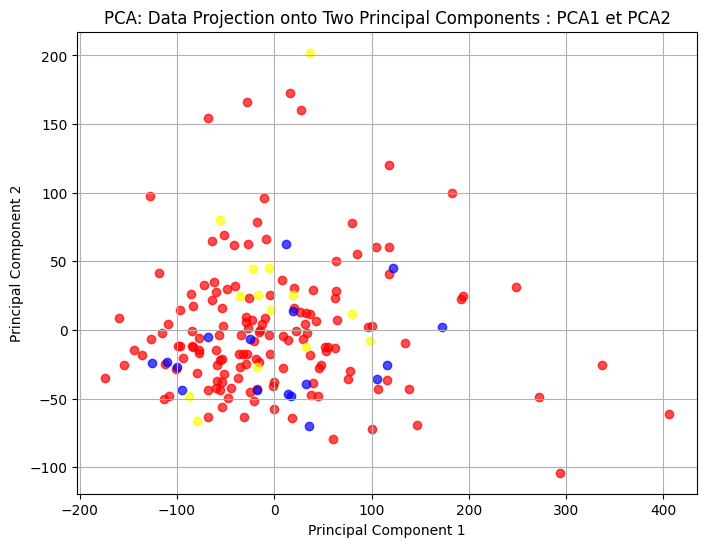

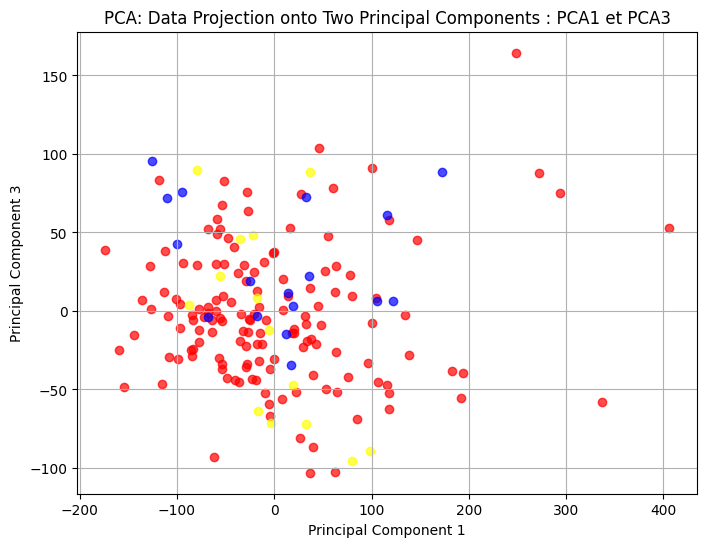

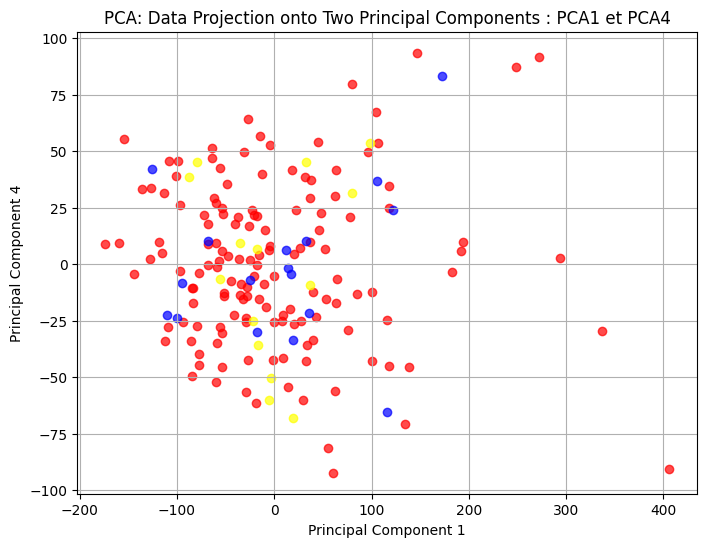

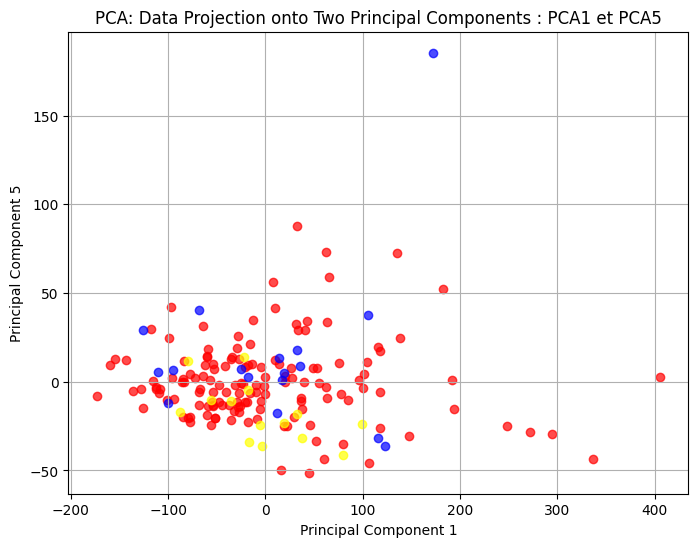

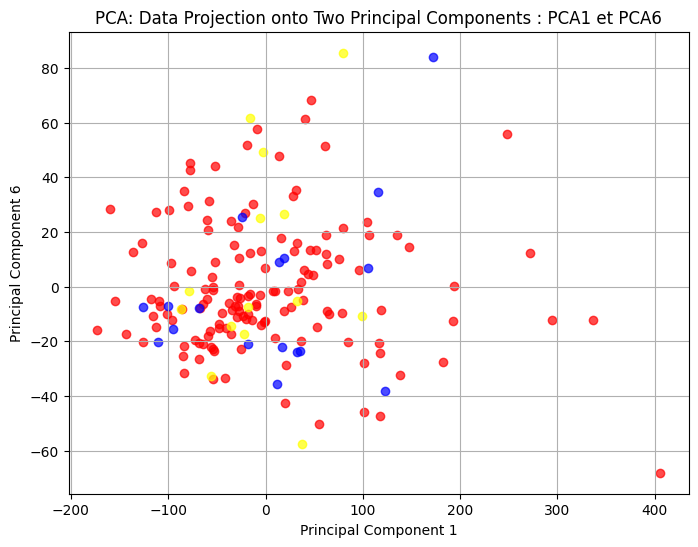

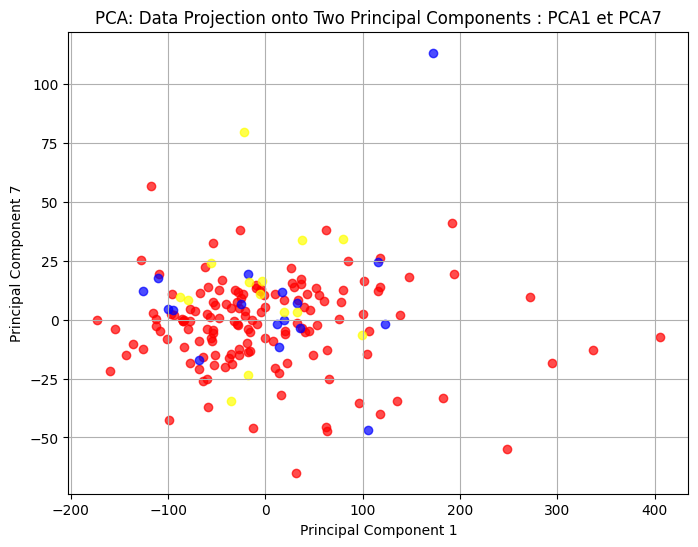

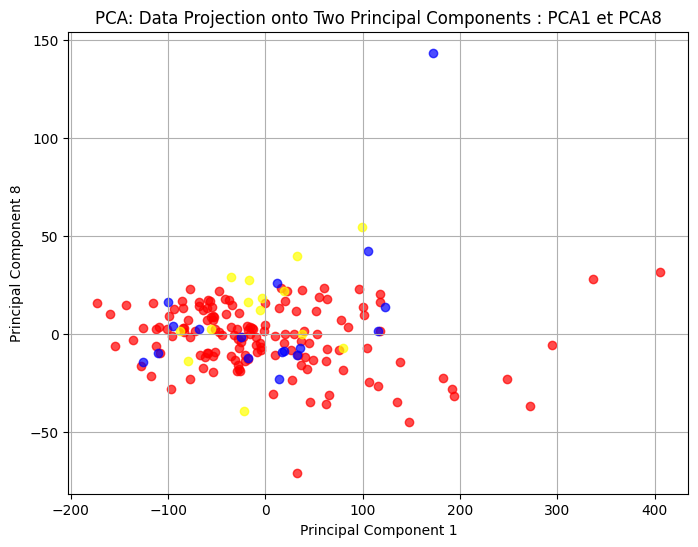

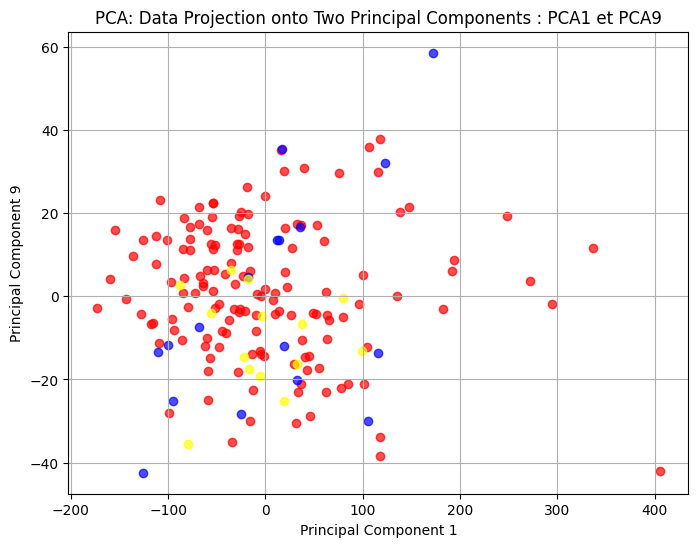

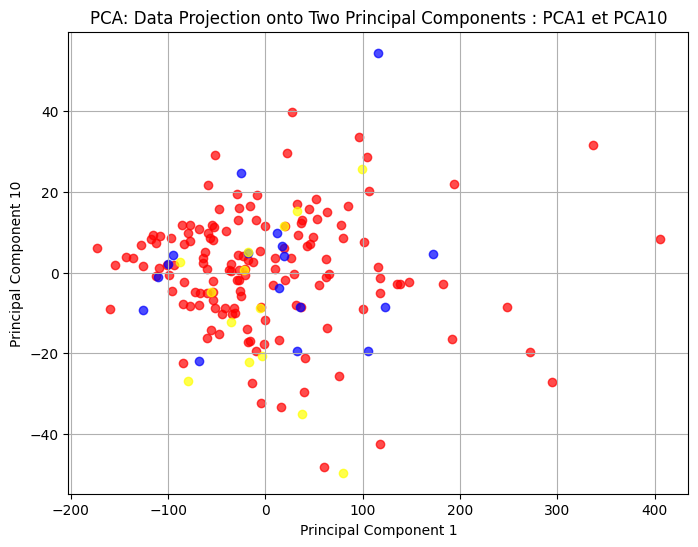

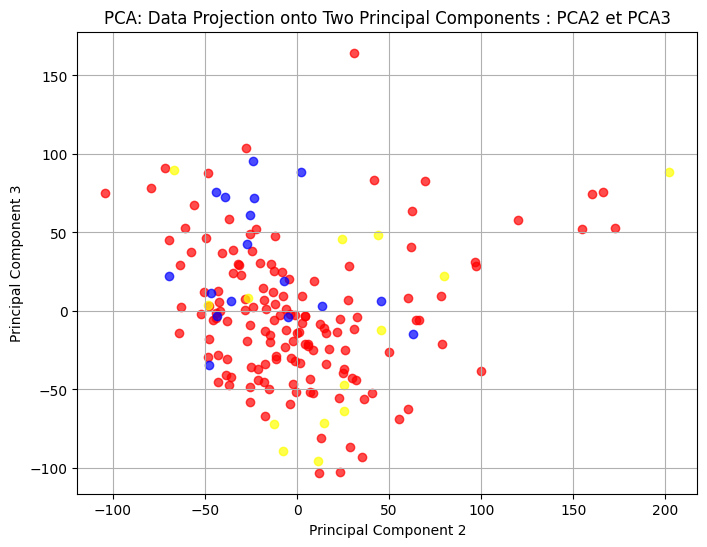

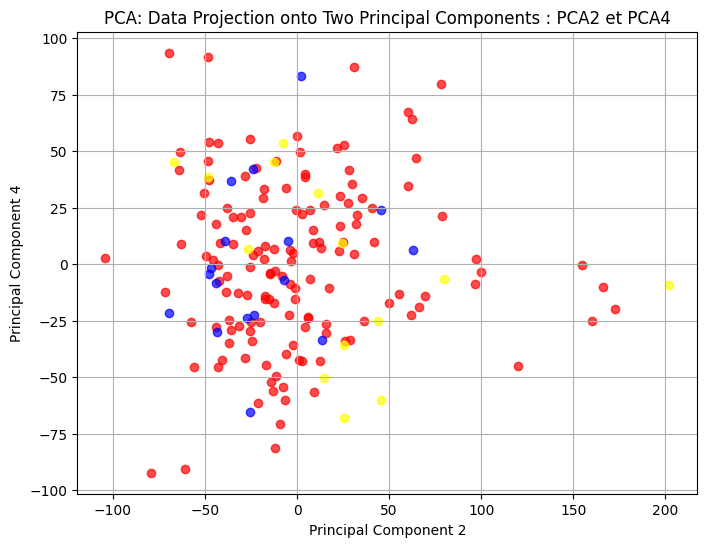

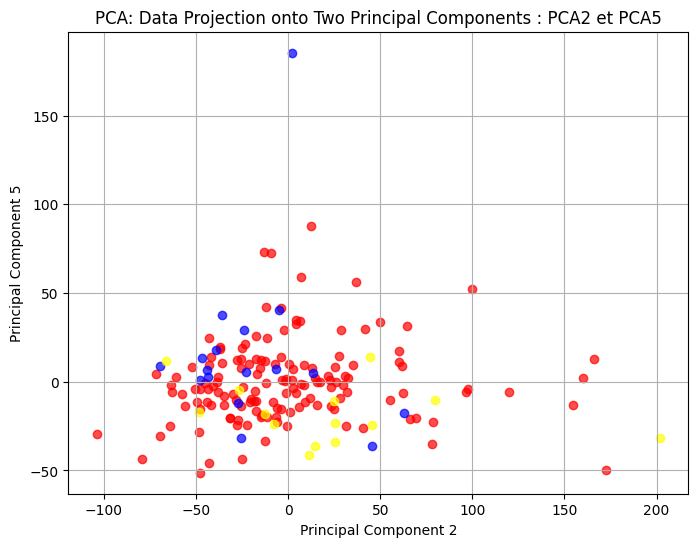

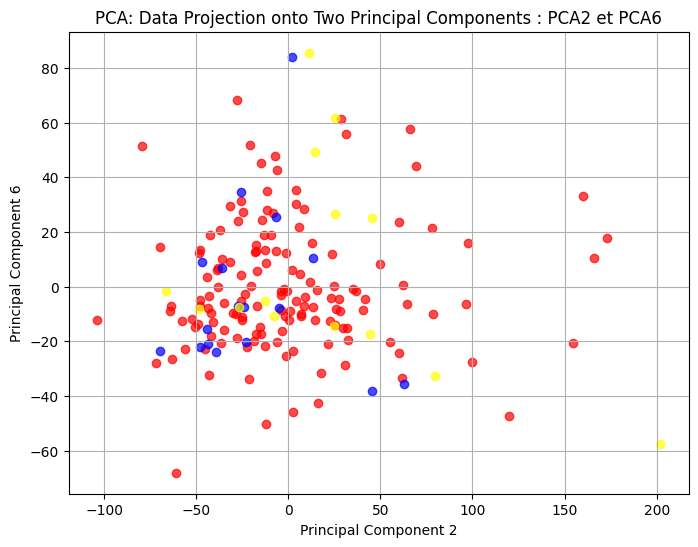

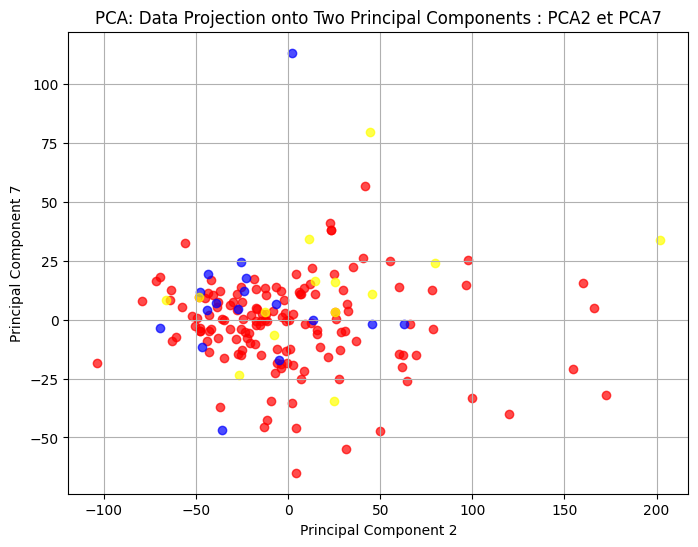

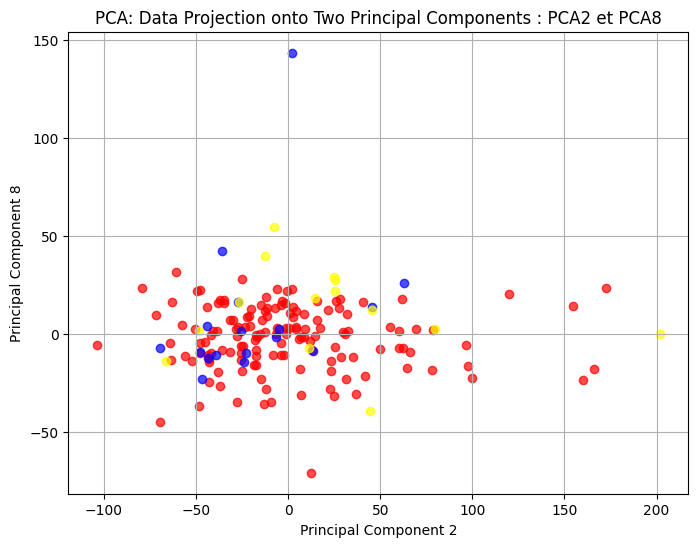

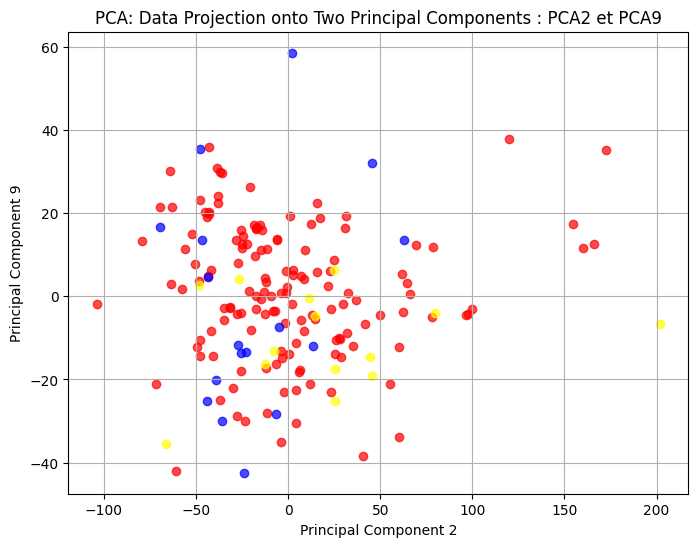

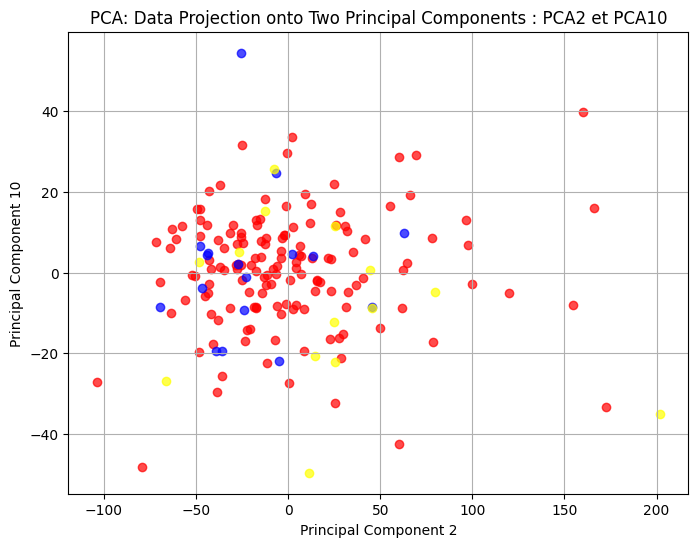

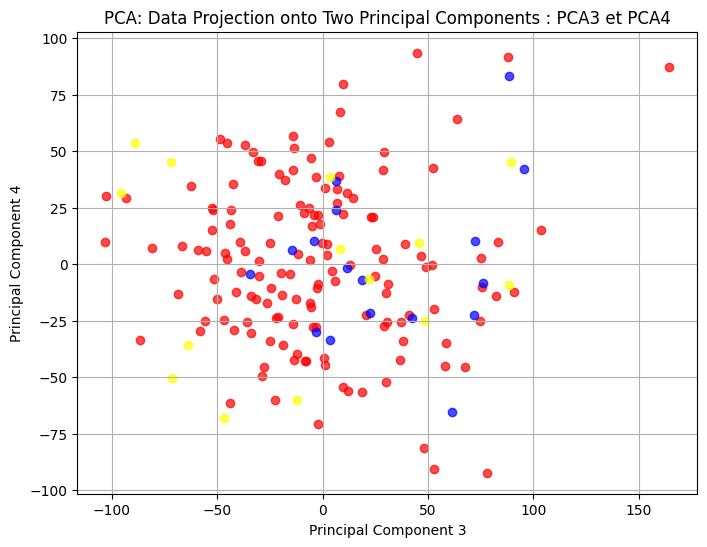

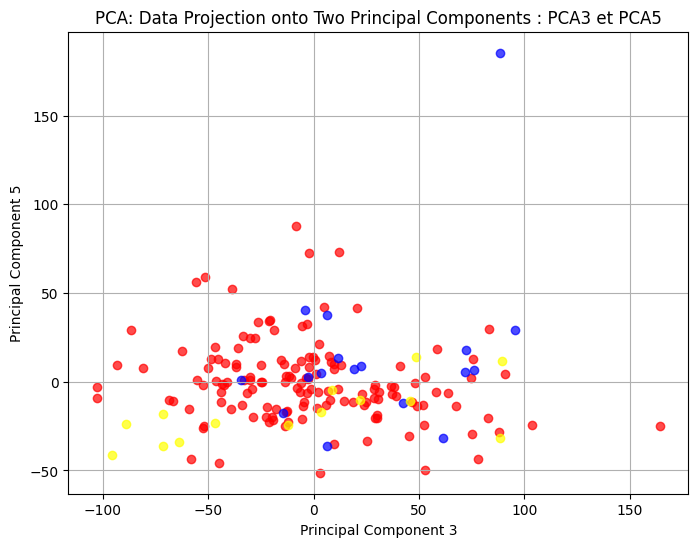

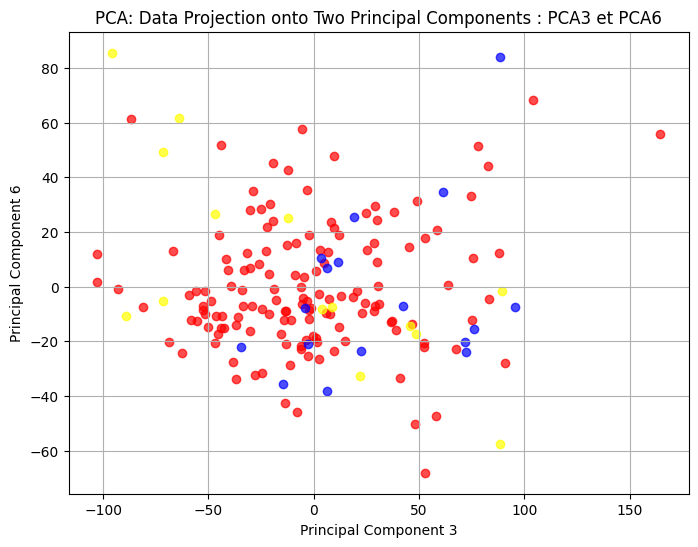

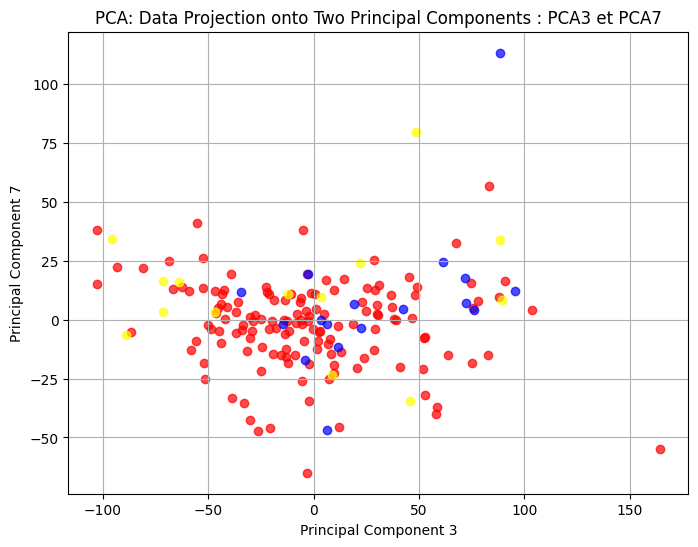

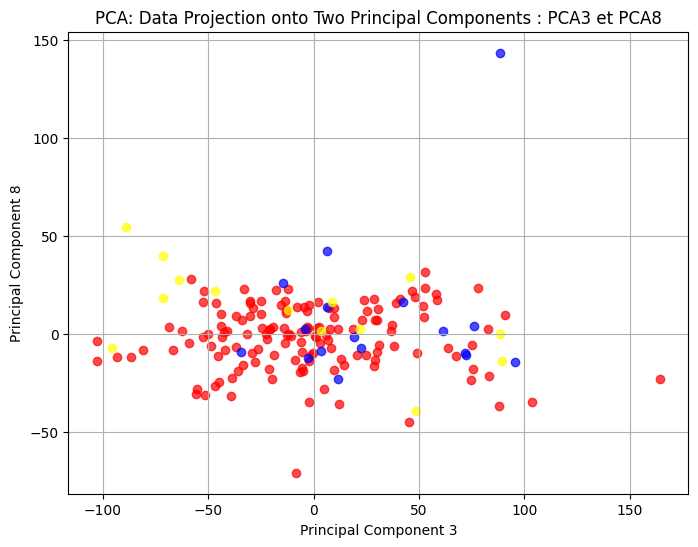

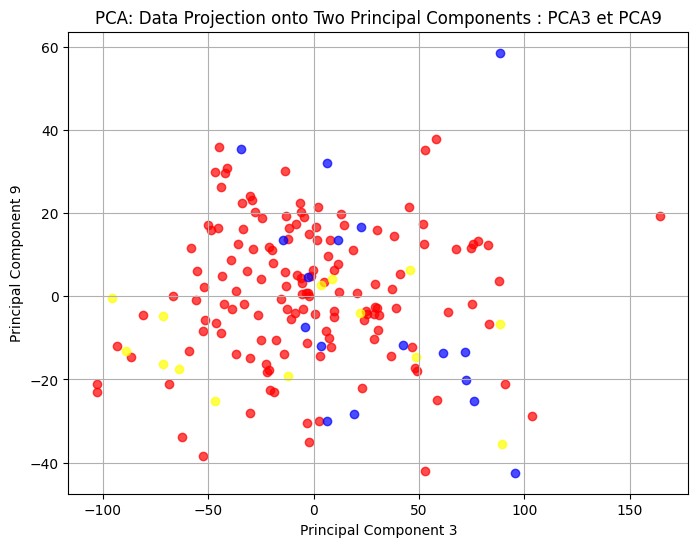

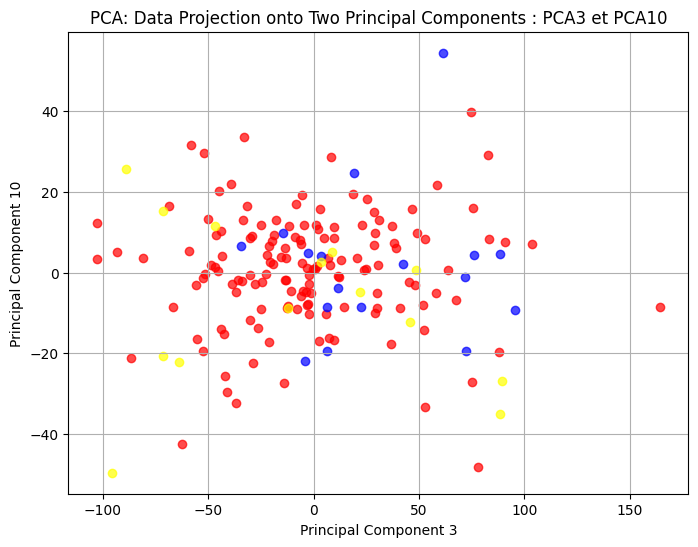

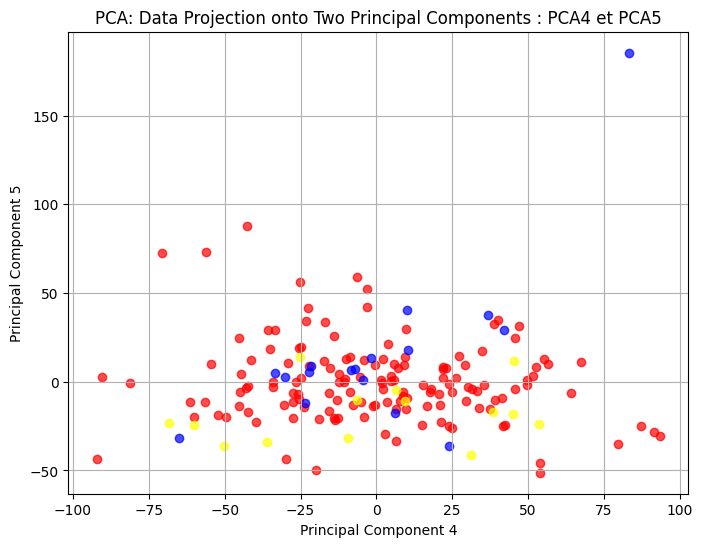

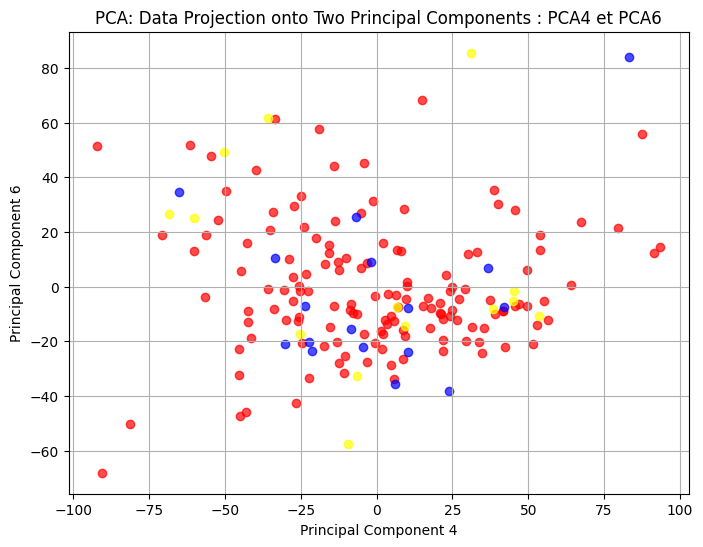

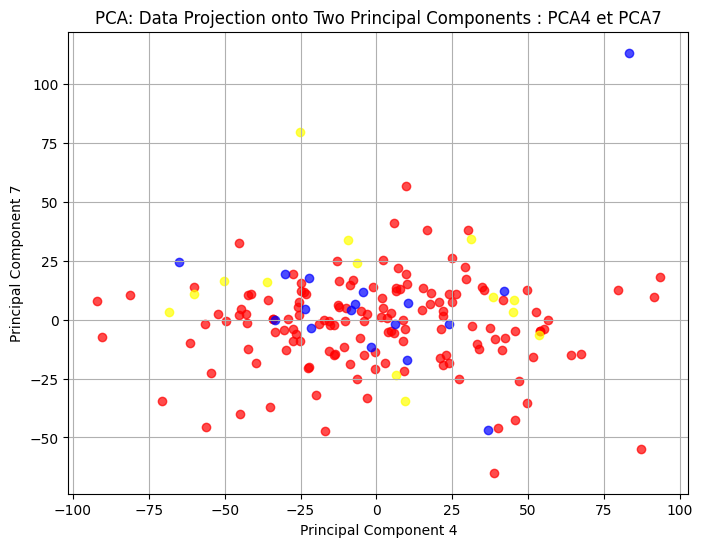

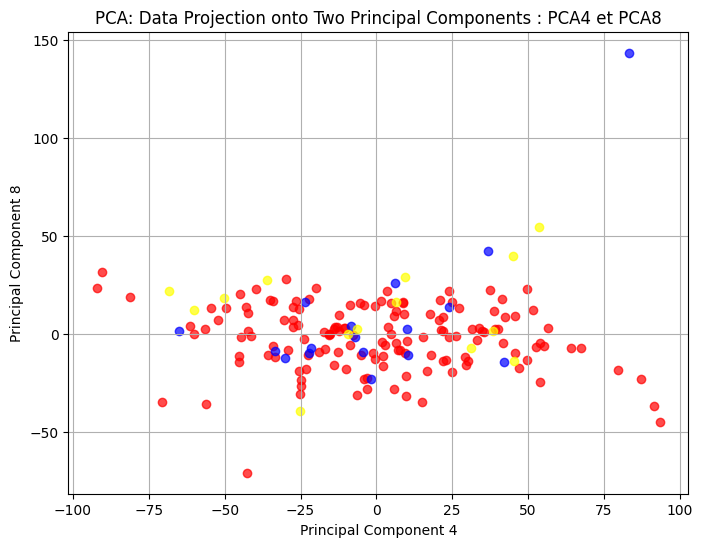

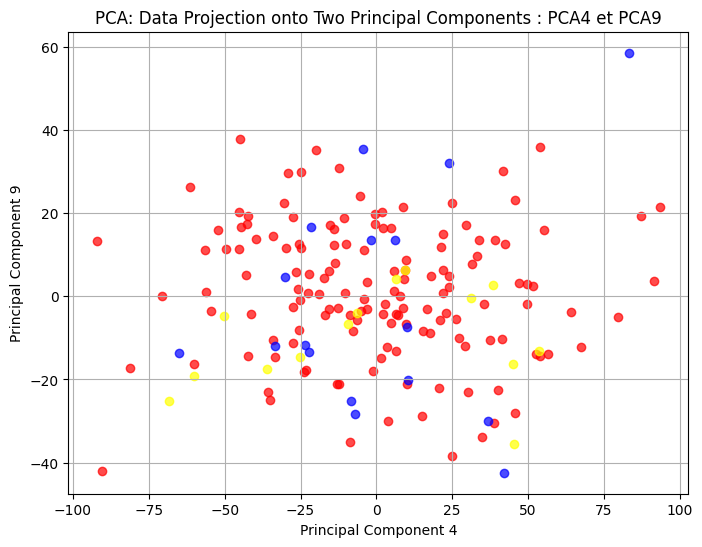

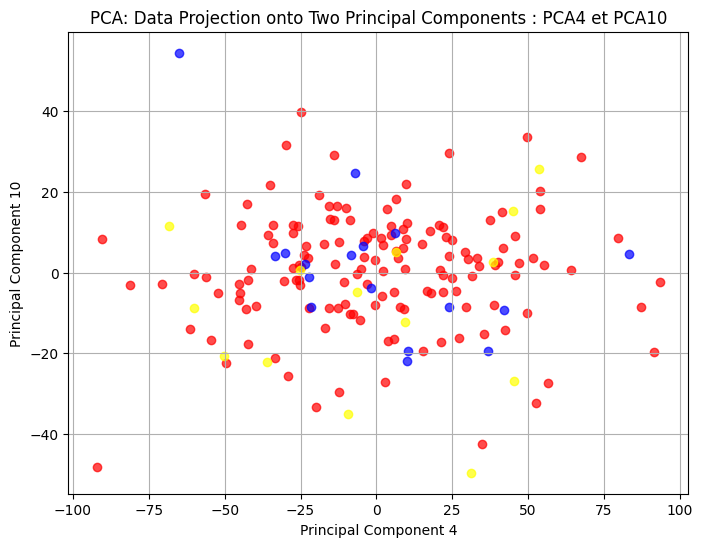

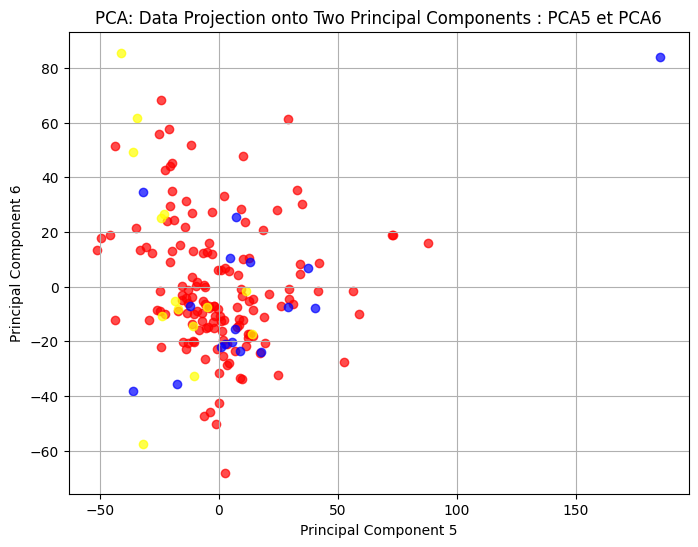

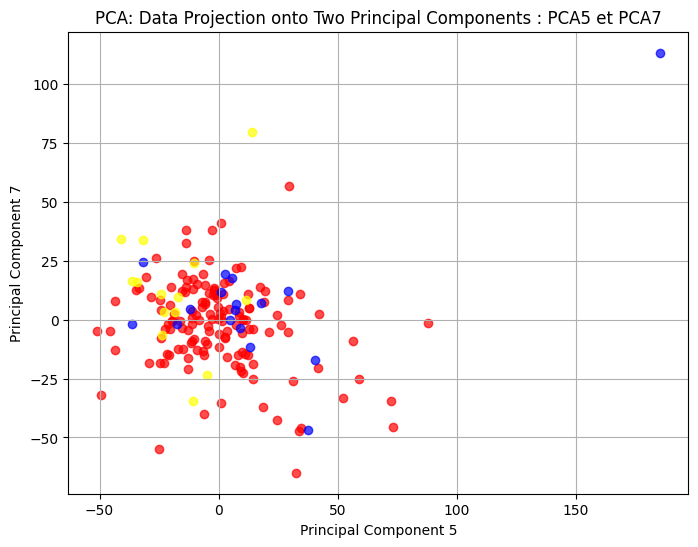

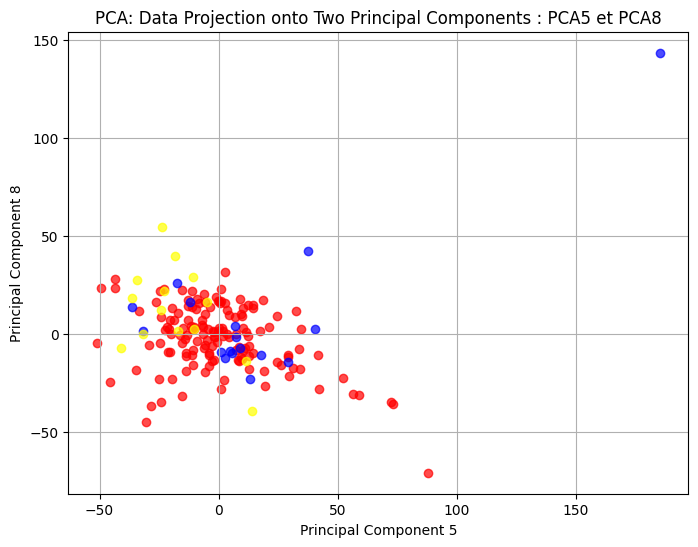

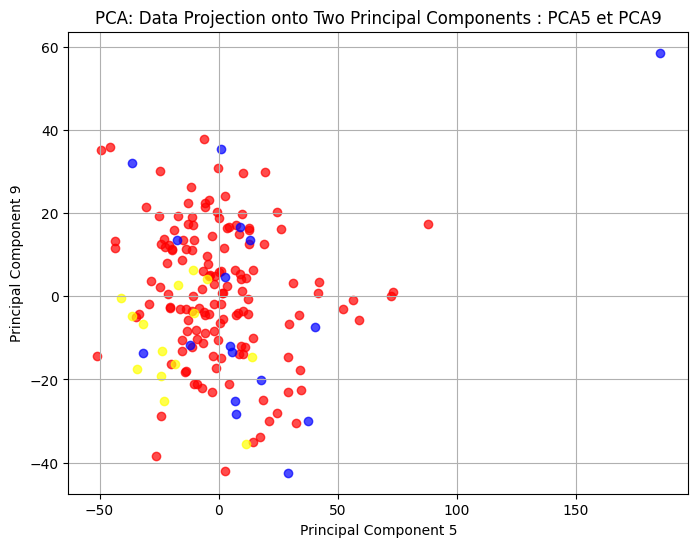

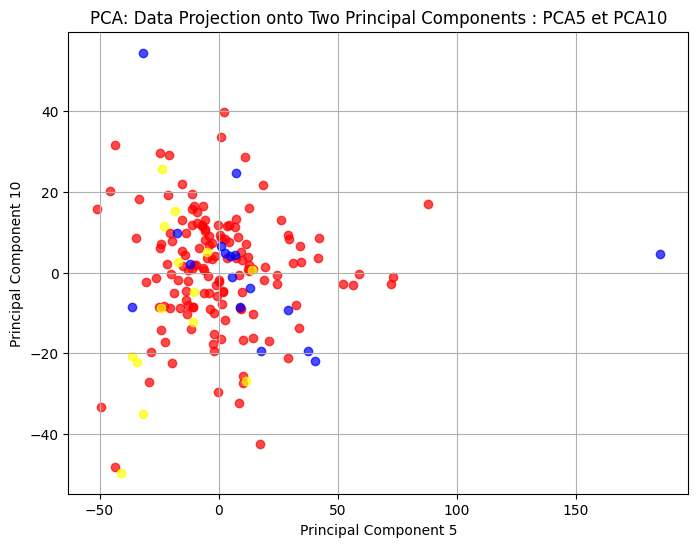

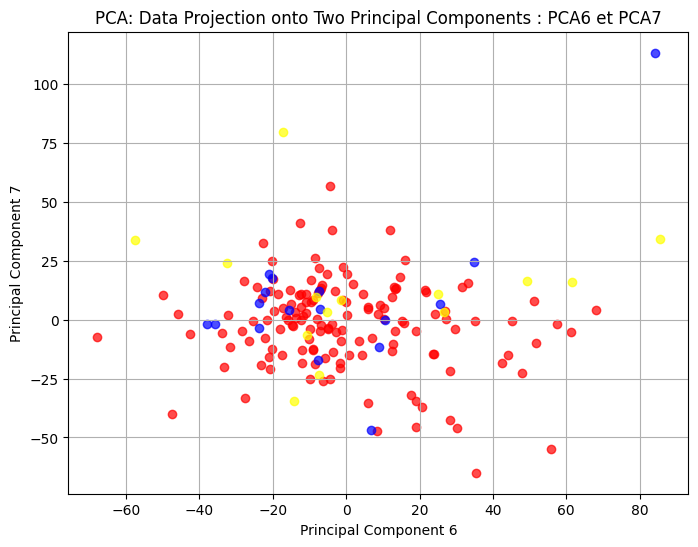

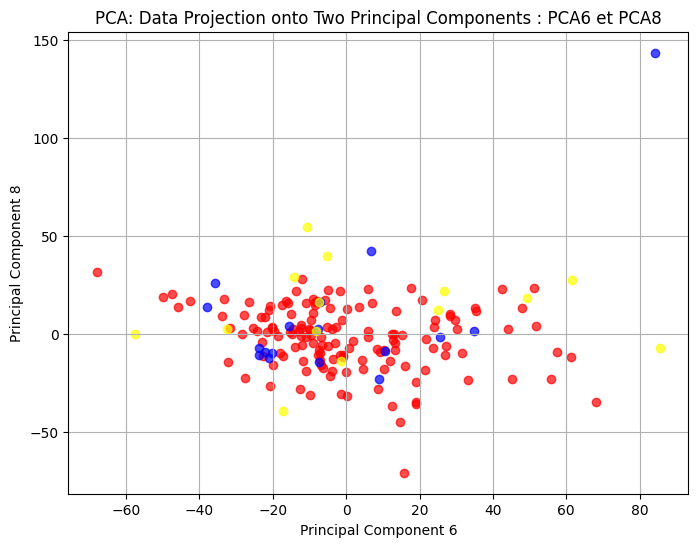

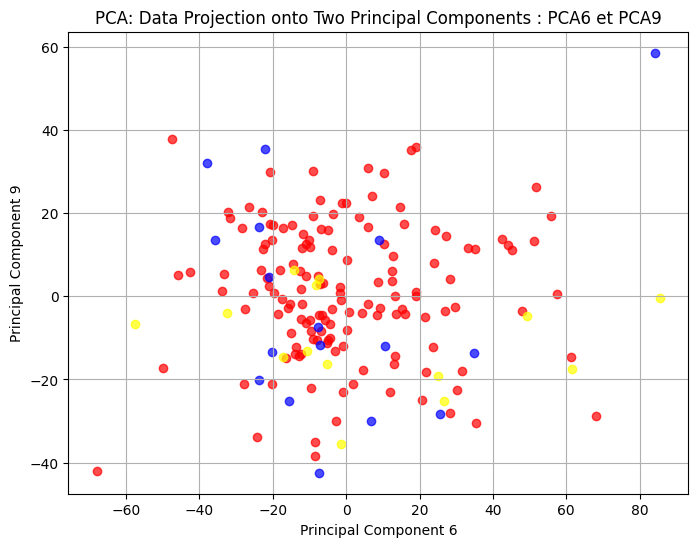

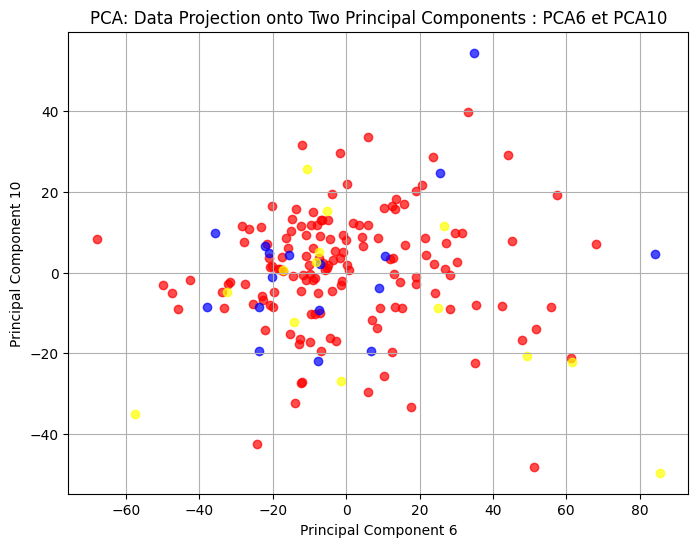

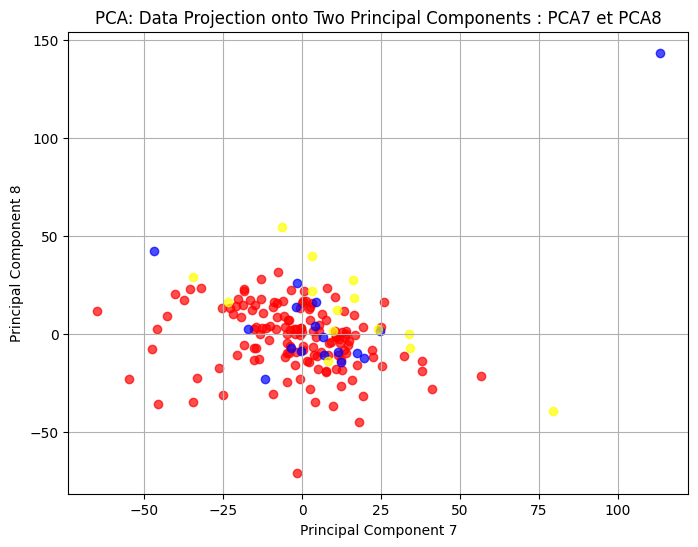

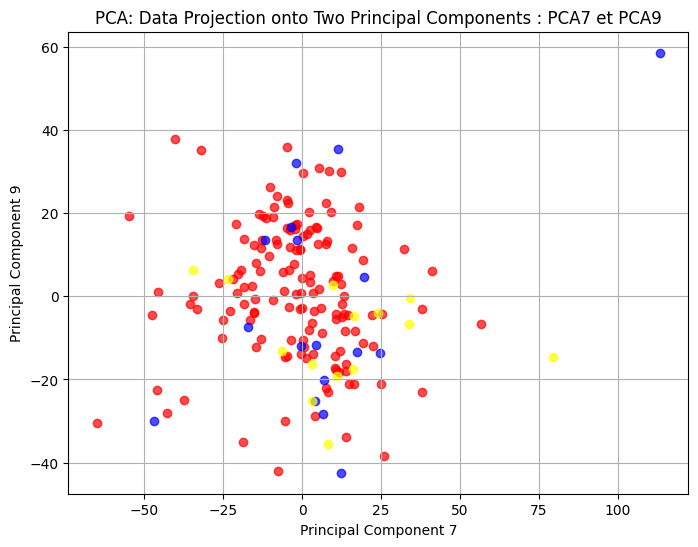

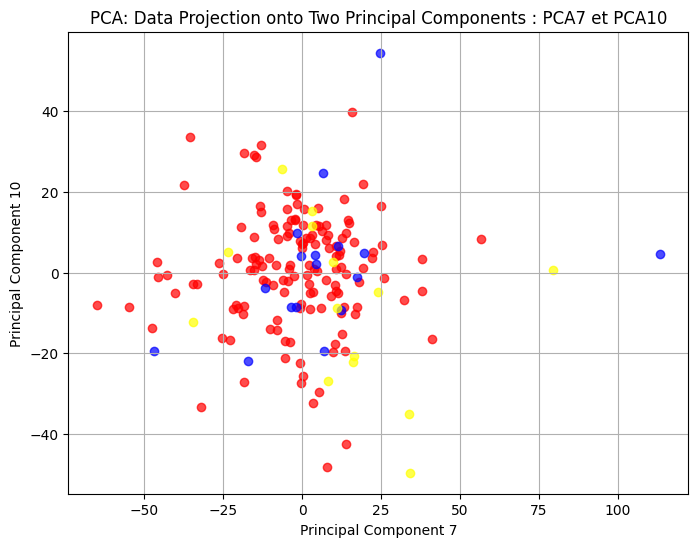

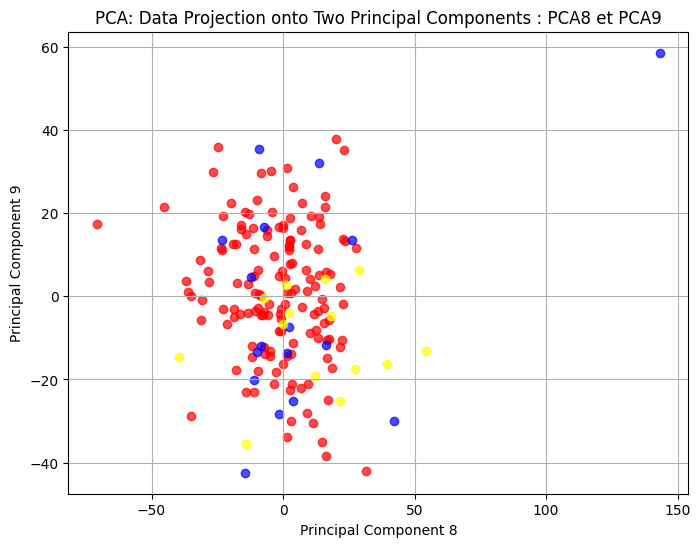

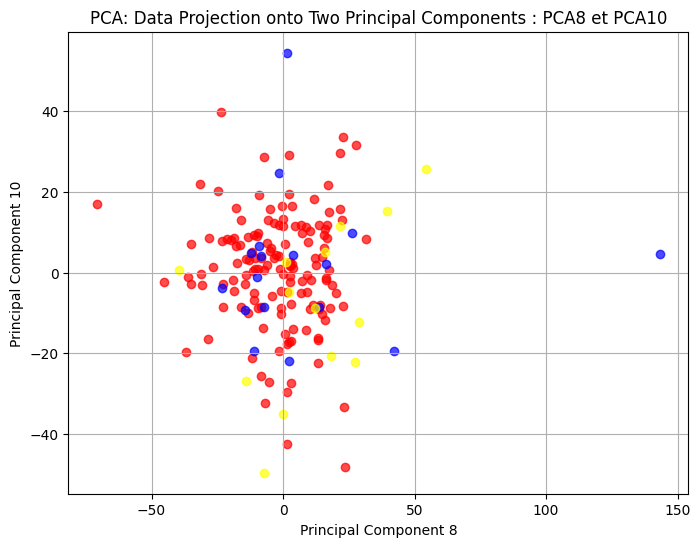

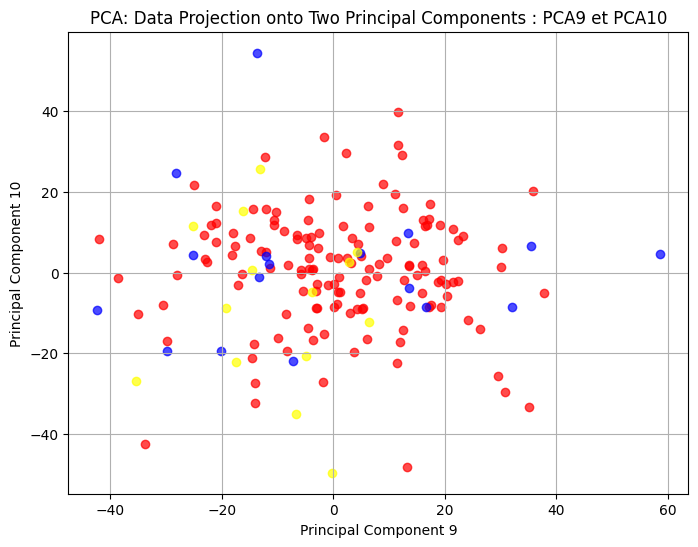

In [87]:
# Scatter plot of PCA results
for i in range(10):
    for j in range(i+1, 10) :

        plt.figure(figsize=(8, 6))
        for label in df_pca["Sample_group"].unique():
            subset = df_pca[df_pca["Sample_group"] == label]
            plt.scatter(subset[components[i]], subset[components[j]], label=label, color=color_map[label], alpha=0.7)
        plt.xlabel("Principal Component "+ str(i + 1 ))
        plt.ylabel("Principal Component " + str(j + 1))
        plt.title("PCA: Data Projection onto Two Principal Components : PCA" + str(i+1) + " et PCA" + str(j+1))
        plt.grid()
        plt.show()

## Step 5

In [88]:
import os
import pickle as pkl

import numpy as np

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats
from pydeseq2.utils import load_example_data

In [89]:
counts_df = c_data.get_data_genes()
metadata = c_data.get_data_matrix()[['Sample_group']]

In [90]:
samples_to_keep = ~metadata.Sample_group.isna()
counts_df = counts_df.loc[samples_to_keep]
metadata = metadata.loc[samples_to_keep]

In [91]:
counts_df

A1BG  A1BG-AS1  A1CF   A2M  A2M-AS1  A2ML1  A2MP1  A3GALT2  \
Sample_id                                                                
GSM3533230    42       149     0  3327      101     78      4        0   
GSM3533231    25       107     2  1787      153    109      2        1   
GSM3533232    20        95     0  1830      121    127      1        1   
GSM3533233    22       101     0  2131      142    143      5        1   
GSM3533234    22       102     0  1706       83    178      1        3   
...          ...       ...   ...   ...      ...    ...    ...      ...   
GSM3533401    23       113     0  2130       72     71      2        3   
GSM3533402   134       300     0  6077      171     42      8        5   
GSM3533403    64       290     0  4752      118    174      8        2   
GSM3533404   124       332     0  3516      141    173      3        2   
GSM3533405    76       193     0  4278      140    102      2        3   

            A4GALT  A4GNT  ...  X6B_LINE:CR1:LINE  X7A_LINE:CR1:LINE  \
Sample_id                  ...                                         
GSM3533230      67      0  ...                986               2218   
GSM3533231      25      0  ...               1216               2373   
GSM3533232      11      0  ...                905               2018   
GSM3533233      36      0  ...                935               2278   
GSM3533234      31      0  ...                966               2295   
...            ...    ...  ...                ...                ...   
GSM3533401      21      0  ...                553               1243   
GSM3533402     225      0  ...                719               1988   
GSM3533403     135      0  ...                623               1466   
GSM3533404     192      0  ...                743               1846   
GSM3533405     141      0  ...                695               1782   

            X7B_LINE:CR1:LINE  X7C_LINE:CR1:LINE  X7D_LINE:CR1:LINE  \
Sample_id                                                             
GSM3533230               2096               1120                 84   
GSM3533231               2001               1144                118   
GSM3533232               1815               1011                 84   
GSM3533233               2032               1198                 97   
GSM3533234               1993               1152                 96   
...                       ...                ...                ...   
GSM3533401               1089                658                 72   
GSM3533402               1691                966                119   
GSM3533403               1246                726                 61   
GSM3533404               1680                936                110   
GSM3533405               1432                929                 67   

            X8_LINE:CR1:LINE  X9_LINE:L1:LINE  Zaphod2:hAT-Tip100:DNA  \
Sample_id                                                               
GSM3533230               556              134                     570   
GSM3533231               582              153                     552   
GSM3533232               571              126                     479   
GSM3533233               562              132                     540   
GSM3533234               582              124                     539   
...                      ...              ...                     ...   
GSM3533401               320               73                     311   
GSM3533402               460              109                     399   
GSM3533403               358              107                     347   
GSM3533404               479              120                     503   
GSM3533405               456              104                     427   

            Zaphod3:hAT-Tip100:DNA  Zaphod:hAT-Tip100:DNA  
Sample_id                                                  
GSM3533230                    2045                   2446  
GSM3533231                    2057                   2279 

In [92]:
metadata

Sample_group
Sample_id                   
GSM3533230  ALS Spectrum MND
GSM3533231  ALS Spectrum MND
GSM3533232  ALS Spectrum MND
GSM3533233  ALS Spectrum MND
GSM3533234  ALS Spectrum MND
...                      ...
GSM3533401  ALS Spectrum MND
GSM3533402  ALS Spectrum MND
GSM3533403  ALS Spectrum MND
GSM3533404  ALS Spectrum MND
GSM3533405  ALS Spectrum MND

[176 rows x 1 columns]

In [93]:
genes_to_keep = counts_df.columns[counts_df.sum(axis=0) >= 10]
counts_df = counts_df[genes_to_keep]

In [94]:


# Set the number of CPUs to use (adjust as per your machine)
inference = DefaultInference(n_cpus=8)

# Create the DESeqDataSet object
dds = DeseqDataSet(
    counts=counts_df,
    metadata=metadata,
    design="~Sample_group",  # 'Sample_group' will be used to compare the conditions
    refit_cooks=True,
    inference=inference,
)


TypeError: __init__() got an unexpected keyword argument 'design'

In [ ]:
dds.deseq2()

Fitting size factors...
... done in 0.11 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 46.92 seconds.

Fitting dispersion trend curve...
... done in 0.57 seconds.

Fitting MAP dispersions...
... done in 48.74 seconds.

Fitting LFCs...
... done in 4.39 seconds.

Calculating cook's distance...
... done in 0.24 seconds.

Replacing 221 outlier genes.

Fitting dispersions...
... done in 0.34 seconds.

Fitting MAP dispersions...
... done in 0.33 seconds.

Fitting LFCs...
... done in 0.08 seconds.



In [ ]:
# Contrast: specify which groups you want to compare. Adjust based on your design.
contrast_cnm = ["Sample_group", "ALS Spectrum MND", "Non-Neurological Control"]  # Compare two conditions (e.g., 'Group A' vs. 'Group B')

# Perform the differential expression analysis
ds_cnm = DeseqStats(
    dds,
    contrast=contrast_cnm,
    alpha=0.05,  # Set significance threshold for p-value
    cooks_filter=True,  # Remove outliers based on Cook's distance
    independent_filter=True,  # Independent filtering for lowly expressed genes
)

ds_cnm.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: Sample_group ALS Spectrum MND vs Non-Neurological Control
                           baseMean  log2FoldChange     lfcSE      stat  \
A1BG                      35.993900       -0.018093  0.142810 -0.126694   
A1BG-AS1                 113.742744       -0.052955  0.099424 -0.532623   
A1CF                       0.155759        0.590127  1.757745  0.335729   
A2M                     2345.384521       -0.119105  0.160232 -0.743329   
A2M-AS1                   99.268402        0.186468  0.097540  1.911716   
...                             ...             ...       ...       ...   
X8_LINE:CR1:LINE         458.854980       -0.058600  0.103594 -0.565669   
X9_LINE:L1:LINE          109.576019        0.073868  0.110992  0.665525   
Zaphod2:hAT-Tip100:DNA   411.010284       -0.065305  0.105699 -0.617834   
Zaphod3:hAT-Tip100:DNA  1539.491089       -0.107348  0.107347 -1.000003   
Zaphod:hAT-Tip100:DNA   1710.104370       -0.084252  0.096951 -0.869016   

   

... done in 1.84 seconds.



In [ ]:
res_df_cnm = ds_cnm.results_df
res_df_cnm

baseMean  log2FoldChange     lfcSE      stat  \
A1BG                      35.993900       -0.018093  0.142810 -0.126694   
A1BG-AS1                 113.742744       -0.052955  0.099424 -0.532623   
A1CF                       0.155759        0.590127  1.757745  0.335729   
A2M                     2345.384521       -0.119105  0.160232 -0.743329   
A2M-AS1                   99.268402        0.186468  0.097540  1.911716   
...                             ...             ...       ...       ...   
X8_LINE:CR1:LINE         458.854980       -0.058600  0.103594 -0.565669   
X9_LINE:L1:LINE          109.576019        0.073868  0.110992  0.665525   
Zaphod2:hAT-Tip100:DNA   411.010284       -0.065305  0.105699 -0.617834   
Zaphod3:hAT-Tip100:DNA  1539.491089       -0.107348  0.107347 -1.000003   
Zaphod:hAT-Tip100:DNA   1710.104370       -0.084252  0.096951 -0.869016   

                          pvalue      padj  
A1BG                    0.899182  0.956135  
A1BG-AS1                0.594294  0.780092  
A1CF                    0.737075       NaN  
A2M                     0.457283  0.680841  
A2M-AS1                 0.055913  0.205327  
...                          ...       ...  
X8_LINE:CR1:LINE        0.571619  0.765036  
X9_LINE:L1:LINE         0.505715  0.717554  
Zaphod2:hAT-Tip100:DNA  0.536685  0.741030  
Zaphod3:hAT-Tip100:DNA  0.317309  0.560354  
Zaphod:hAT-Tip100:DNA   0.384838  0.622552  

[26138 rows x 6 columns]

In [ ]:
# Contrast: specify which groups you want to compare. Adjust based on your design.
contrast_als_cm = ["Sample_group", "ALS Spectrum MND", "Other Neurological Disorders"]  # Compare two conditions (e.g., 'Group A' vs. 'Group B')

# Perform the differential expression analysis
ds_cm = DeseqStats(
    dds,
    contrast=contrast_als_cm,
    alpha=0.05,  # Set significance threshold for p-value
    cooks_filter=True,  # Remove outliers based on Cook's distance
    independent_filter=True,  # Independent filtering for lowly expressed genes
)
ds_cm.summary()


Running Wald tests...


Log2 fold change & Wald test p-value: Sample_group ALS Spectrum MND vs Other Neurological Disorders
                           baseMean  log2FoldChange     lfcSE      stat  \
A1BG                      35.993900       -0.133736  0.154884 -0.863463   
A1BG-AS1                 113.742744        0.106113  0.109191  0.971812   
A1CF                       0.155759        0.364436  1.889572  0.192867   
A2M                     2345.384521        0.306505  0.174980  1.751656   
A2M-AS1                   99.268402       -0.045173  0.105309 -0.428955   
...                             ...             ...       ...       ...   
X8_LINE:CR1:LINE         458.854980        0.003441  0.113142  0.030411   
X9_LINE:L1:LINE          109.576019        0.028600  0.120971  0.236419   
Zaphod2:hAT-Tip100:DNA   411.010284        0.124907  0.115590  1.080603   
Zaphod3:hAT-Tip100:DNA  1539.491089        0.081647  0.117241  0.696400   
Zaphod:hAT-Tip100:DNA   1710.104370        0.089159  0.105887  0.842018   


... done in 0.31 seconds.



In [ ]:
res_df_cm = ds_cm.results_df

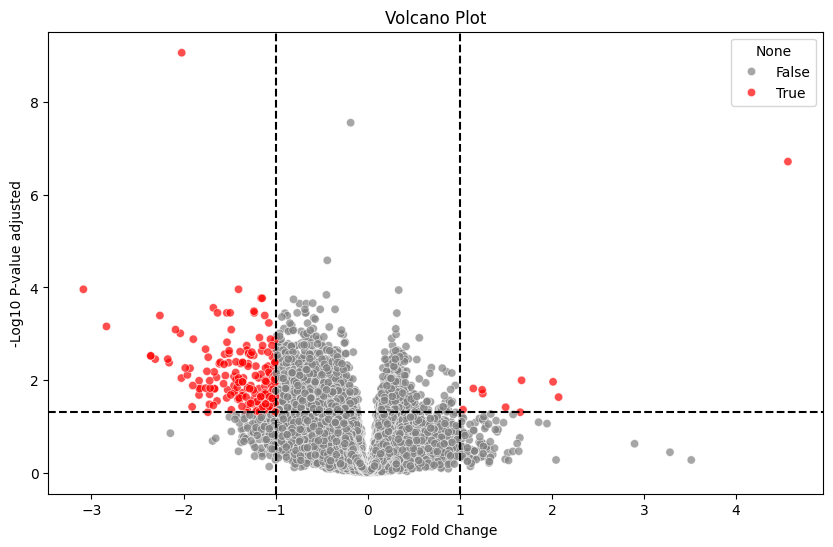

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add a column for -log10(p-value)
res_df_cnm['-log10p'] = -np.log10(res_df_cnm['padj'])

# Set thresholds for significance
significance_threshold = 0.05
log2_fc_threshold = 1  # Adjust based on your data

# Create a volcano plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=res_df_cnm,
    x='log2FoldChange',
    y='-log10p',
    hue=(res_df_cnm['padj'] < significance_threshold) & (abs(res_df_cnm['log2FoldChange']) > log2_fc_threshold),
    palette={True: 'red', False: 'grey'},
    alpha=0.7
)

# Add threshold lines for significance
plt.axhline(y=-np.log10(significance_threshold), color='black', linestyle='--')  # p-value threshold
plt.axvline(x=-log2_fc_threshold, color='black', linestyle='--')  # log2 fold change threshold
plt.axvline(x=log2_fc_threshold, color='black', linestyle='--')  # log2 fold change threshold

# Customize the plot
plt.title('Volcano Plot')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 P-value adjusted')
plt.show()


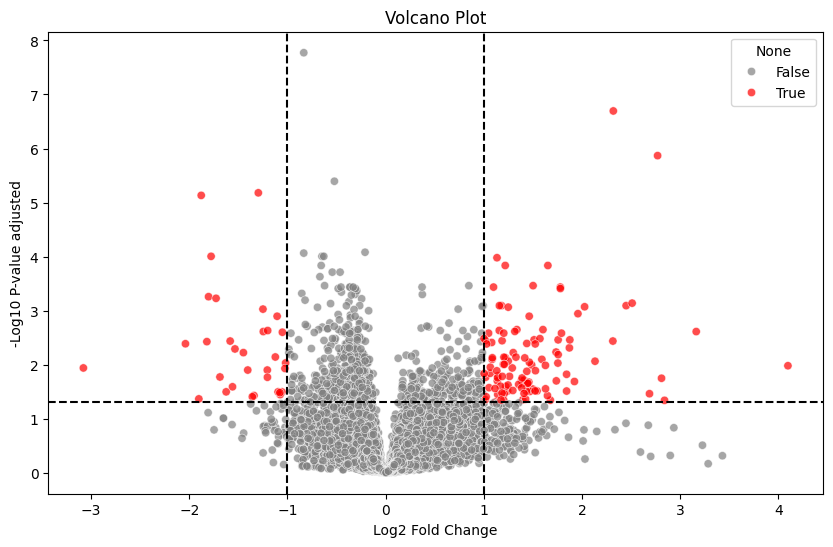

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add a column for -log10(p-value)
res_df_cm['-log10p'] = -np.log10(res_df_cm['padj'])

# Set thresholds for significance
significance_threshold = 0.05
log2_fc_threshold = 1  # Adjust based on your data

# Create a volcano plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=res_df_cm,
    x='log2FoldChange',
    y='-log10p',
    hue=(res_df_cm['padj'] < significance_threshold) & (abs(res_df_cm['log2FoldChange']) > log2_fc_threshold),
    palette={True: 'red', False: 'grey'},
    alpha=0.7
)

# Add threshold lines for significance
plt.axhline(y=-np.log10(significance_threshold), color='black', linestyle='--')  # p-value threshold
plt.axvline(x=-log2_fc_threshold, color='black', linestyle='--')  # log2 fold change threshold
plt.axvline(x=log2_fc_threshold, color='black', linestyle='--')  # log2 fold change threshold

# Customize the plot
plt.title('Volcano Plot')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10 P-value adjusted')
plt.show()

In [ ]:
res_cm = res_df_cm[(res_df_cm['padj'] < significance_threshold) & (abs(res_df_cm['log2FoldChange']) > log2_fc_threshold)]
res_cnm = res_df_cnm[(res_df_cnm['padj'] < significance_threshold) & (abs(res_df_cnm['log2FoldChange']) > log2_fc_threshold)]

In [ ]:
res_cm['Ordre'] = abs(res_cm['log2FoldChange']) * 0.5 + abs(res_cm['padj'])*0.5
res_cnm['Ordre'] = abs(res_cnm['log2FoldChange']) * 0.5 + abs(res_cnm['padj'])*0.5

/tmp/ipykernel_14283/1943356044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_cm['Ordre'] = abs(res_cm['log2FoldChange']) * 0.5 + abs(res_cm['padj'])*0.5
/tmp/ipykernel_14283/1943356044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_cnm['Ordre'] = abs(res_cnm['log2FoldChange']) * 0.5 + abs(res_cnm['padj'])*0.5


In [ ]:
sorted_res_cm = res_cm.sort_values(by='Ordre', ascending=False)
sorted_res_cnm = res_cnm.sort_values(by='Ordre', ascending=False)

In [ ]:
sorted_res_cm

baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ACTG2         3.307989        4.099158  1.068170  3.837551  0.000124   
MUC5B        11.974482        3.164826  0.719948  4.395909  0.000011   
LINC01108     2.198125       -3.079378  0.809538 -3.803871  0.000142   
HP            4.807042        2.841779  0.906615  3.134494  0.001722   
LINC00841     2.094459        2.811259  0.780775  3.600600  0.000317   
...                ...             ...       ...       ...       ...   
VWF        1196.677002        1.029745  0.245696  4.191131  0.000028   
CCDC168      25.689898       -1.018561  0.262271 -3.883614  0.000103   
MYL9         55.161808        1.017647  0.239417  4.250529  0.000021   
TNFRSF1B    182.950546        1.003768  0.271993  3.690419  0.000224   
TM4SF1      196.734039        1.002894  0.233711  4.291175  0.000018   

               padj   -log10p     Ordre  
ACTG2      0.010474  1.979900  2.054816  
MUC5B      0.002443  2.612108  1.583635  
LINC01108  0.011508  1.938999  1.545443  
HP         0.045738  1.339723  1.443758  
LINC00841  0.017839  1.748627  1.414549  
...             ...       ...       ...  
VWF        0.004134  2.383680  0.516939  
CCDC168    0.009299  2.031583  0.513930  
MYL9       0.003568  2.447534  0.510608  
TNFRSF1B   0.014606  1.835481  0.509187  
TM4SF1     0.003291  2.482722  0.503092  

[144 rows x 8 columns]

In [ ]:
common_genes = sorted_res_cm.index.intersection(sorted_res_cnm.index)

# Afficher les résultats
print(common_genes)

Index(['ADGRE1', 'STC1', 'IL1B', 'CXCL1', 'SECTM1', 'AMN', 'PIK3CD-AS2'], dtype='object')


In [ ]:
cm_common = sorted_res_cm.loc[common_genes]
cnm_common = sorted_res_cnm.loc[common_genes]

# Display the rows for the common genes
print("Rows from cm:")
print(cm_common['Ordre'])

print("\nRows from cnm:")
print(cnm_common['Ordre'])

Rows from cm:
ADGRE1        0.972221
STC1          0.777116
IL1B          0.750804
CXCL1         0.721067
SECTM1        0.624705
AMN           0.608997
PIK3CD-AS2    0.563704
Name: Ordre, dtype: float64

Rows from cnm:
ADGRE1        0.676473
STC1          0.672160
IL1B          0.881331
CXCL1         0.778033
SECTM1        0.544720
AMN           0.510924
PIK3CD-AS2    0.562183
Name: Ordre, dtype: float64


attention regarder comment mieux classer en prenant en compte leur ordre avant

In [ ]:
sorted_res_cm.loc[sorted_res_cm.index.isin(common_genes), 'Ordre'] = 10
sorted_res_cnm.loc[sorted_res_cnm.index.isin(common_genes), 'Ordre'] = 10

In [ ]:
sorted_res_cm = sorted_res_cm.sort_values(by='Ordre', ascending=False)
sorted_res_cm

baseMean  log2FoldChange     lfcSE      stat    pvalue  \
PIK3CD-AS2     1.248269       -1.095556  0.330471 -3.315131  0.000916   
ADGRE1        10.500095        1.923936  0.542676  3.545277  0.000392   
AMN            2.979769       -1.205408  0.319739 -3.769969  0.000163   
IL1B          55.779003        1.470401  0.442342  3.324126  0.000887   
CXCL1          9.356680        1.397377  0.443960  3.147532  0.001647   
...                 ...             ...       ...       ...       ...   
VWF         1196.677002        1.029745  0.245696  4.191131  0.000028   
CCDC168       25.689898       -1.018561  0.262271 -3.883614  0.000103   
MYL9          55.161808        1.017647  0.239417  4.250529  0.000021   
TNFRSF1B     182.950546        1.003768  0.271993  3.690419  0.000224   
TM4SF1       196.734039        1.002894  0.233711  4.291175  0.000018   

                padj   -log10p      Ordre  
PIK3CD-AS2  0.031853  1.496848  10.000000  
ADGRE1      0.020507  1.688097  10.000000  
AMN         0.012587  1.900090  10.000000  
IL1B        0.031207  1.505753  10.000000  
CXCL1       0.044756  1.349148  10.000000  
...              ...       ...        ...  
VWF         0.004134  2.383680   0.516939  
CCDC168     0.009299  2.031583   0.513930  
MYL9        0.003568  2.447534   0.510608  
TNFRSF1B    0.014606  1.835481   0.509187  
TM4SF1      0.003291  2.482722   0.503092  

[144 rows x 8 columns]

In [ ]:
sorted_res_cnm = sorted_res_cnm.sort_values(by='Ordre', ascending=False)
sorted_res_cnm

baseMean  log2FoldChange     lfcSE      stat    pvalue      padj  \
AMN        2.979769       -1.002482  0.298984 -3.352962  0.000800  0.019366   
IL1B      55.779003       -1.760517  0.397066 -4.433819  0.000009  0.002146   
CXCL1      9.356680       -1.553304  0.361742 -4.293952  0.000018  0.002761   
STC1      36.684105       -1.321106  0.406791 -3.247630  0.001164  0.023213   
ADGRE1    10.500095       -1.310027  0.451334 -2.902568  0.003701  0.042919   
...             ...             ...       ...       ...       ...       ...   
CDC42BPG   2.725452       -1.002056  0.275667 -3.635025  0.000278  0.011327   
CYP21A1P   5.708154       -1.003906  0.268832 -3.734319  0.000188  0.009356   
ZDHHC19    5.376015       -1.008266  0.245512 -4.106786  0.000040  0.004130   
LY6G5B    31.311668       -1.006916  0.219052 -4.596694  0.000004  0.001362   
AQP8       3.472199       -1.003520  0.240666 -4.169768  0.000030  0.003585   

           -log10p      Ordre  
AMN       1.712958  10.000000  
IL1B      2.668362  10.000000  
CXCL1     2.558921  10.000000  
STC1      1.634260  10.000000  
ADGRE1    1.367355  10.000000  
...            ...        ...  
CDC42BPG  1.945886   0.506692  
CYP21A1P  2.028906   0.506631  
ZDHHC19   2.384081   0.506198  
LY6G5B    2.865944   0.504139  
AQP8      2.445505   0.503553  

[194 rows x 8 columns]

# Step 7

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
sorted_res_cnm

baseMean  log2FoldChange     lfcSE      stat    pvalue      padj  \
AMN        2.979769       -1.002482  0.298984 -3.352962  0.000800  0.019366   
IL1B      55.779003       -1.760517  0.397066 -4.433819  0.000009  0.002146   
CXCL1      9.356680       -1.553304  0.361742 -4.293952  0.000018  0.002761   
STC1      36.684105       -1.321106  0.406791 -3.247630  0.001164  0.023213   
ADGRE1    10.500095       -1.310027  0.451334 -2.902568  0.003701  0.042919   
...             ...             ...       ...       ...       ...       ...   
CDC42BPG   2.725452       -1.002056  0.275667 -3.635025  0.000278  0.011327   
CYP21A1P   5.708154       -1.003906  0.268832 -3.734319  0.000188  0.009356   
ZDHHC19    5.376015       -1.008266  0.245512 -4.106786  0.000040  0.004130   
LY6G5B    31.311668       -1.006916  0.219052 -4.596694  0.000004  0.001362   
AQP8       3.472199       -1.003520  0.240666 -4.169768  0.000030  0.003585   

           -log10p      Ordre  
AMN       1.712958  10.000000  
IL1B      2.668362  10.000000  
CXCL1     2.558921  10.000000  
STC1      1.634260  10.000000  
ADGRE1    1.367355  10.000000  
...            ...        ...  
CDC42BPG  1.945886   0.506692  
CYP21A1P  2.028906   0.506631  
ZDHHC19   2.384081   0.506198  
LY6G5B    2.865944   0.504139  
AQP8      2.445505   0.503553  

[194 rows x 8 columns]

In [ ]:
X = c_data.get_data_genes_normalized()[sorted_res_cnm.index]
y = c_data.get_data_matrix()['Sample_group']
y = y == 'ALS Spectrum MND'

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train) # xtrain is your data matrix, and y is your group labels (ctrl or ALS)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
print(model.feature_importances_)

[0.00125994 0.01920902 0.06253966 0.01982237 0.         0.01740145
 0.01256274 0.00138873 0.         0.01583195 0.         0.
 0.         0.02158656 0.         0.         0.         0.
 0.         0.         0.02616328 0.01936828 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01768926
 0.         0.         0.         0.         0.         0.00778214
 0.03836638 0.         0.         0.         0.         0.01393064
 0.         0.         0.         0.00332408 0.         0.01304352
 0.         0.         0.         0.         0.045316   0.00781815
 0.         0.         0.00464593 0.         0.         0.01453757
 0.         0.         0.03238516 0.02146604 0.         0.00320404
 0.         0.         0.         0.         0.00091355 0.
 0.01309182 0.         0.         0.02732895 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00137493 0.01615253 0.    

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

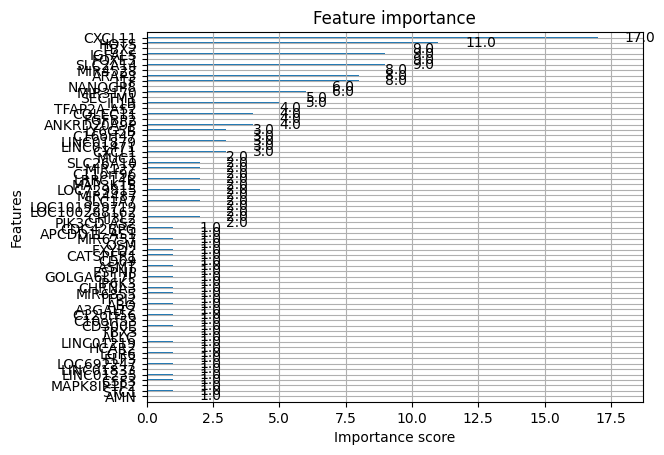

In [ ]:
from xgboost import plot_importance
plot_importance(model)

In [ ]:
model.score(X_val, y_val)

0.8888888888888888

In [ ]:
importances = model.feature_importances_

In [ ]:
indices = np.argsort(importances)[::-1]

# Get the top 100 most important features (if you have at least 100 features)
top_100_indices = indices[:100]

# If you want the names of the top 100 features (assuming X is a pandas DataFrame)
top_100_feature_names = X_train.columns[top_100_indices]

# Display the top 100 feature names and their importance values
top_100_importances = importances[top_100_indices]

# Create a DataFrame for better readability
top_100_df = pd.DataFrame({
    'Feature': top_100_feature_names,
    'Importance': top_100_importances
})

In [ ]:
top_100_df

Feature  Importance
0         CXCL1    0.062540
1       NANOGP8    0.059928
2   APCDD1L-AS1    0.059692
3       MAP3K15    0.045430
4          ELF3    0.045316
..          ...         ...
95        GPR84    0.000000
96       SLAMF7    0.000000
97       ZNF645    0.000000
98    SPATA31A5    0.000000
99    SPATA31A7    0.000000

[100 rows x 2 columns]

In [ ]:
top_100_df.set_index('Feature', inplace=True)

In [ ]:
top_100_df

Importance
Feature                
CXCL1          0.062540
NANOGP8        0.059928
APCDD1L-AS1    0.059692
MAP3K15        0.045430
ELF3           0.045316
...                 ...
GPR84          0.000000
SLAMF7         0.000000
ZNF645         0.000000
SPATA31A5      0.000000
SPATA31A7      0.000000

[100 rows x 1 columns]

In [ ]:
sorted_res_cnm.index.intersection(top_100_df.index)

Index(['AMN', 'IL1B', 'CXCL1', 'STC1', 'PIK3CD-AS2', 'SECTM1', 'MAPK8IP1P2',
       'CSF3', 'SPATA31A5', 'SPATA31A7', 'CXCL11', 'CHI3L2', 'ANKRD20A9P',
       'LGALS17A', 'ZNF645', 'LOC100288162', 'HBD', 'IL6', 'WTAPP1', 'RPL29P2',
       'SPTA1', 'LTF', 'LINC01235', 'NXF2', 'NXF2B', 'CALCB', 'SIX3',
       'LINC01833', 'EXOC3L4', 'TH', 'CARMN', 'FGFBP2', 'MIR4673', 'LOC692247',
       'SELE', 'GPX2', 'GZMA', 'MIR181B1', 'ELF3', 'LGR6', 'MROH5', 'DGKK',
       'HCAR2', 'SLAMF7', 'SLC2A14', 'LINC01219', 'HOTS', 'LOC101929719',
       'SLC1A7', 'ALLC', 'TBX3', 'MIR4487', 'CD300E', 'LINC01471', 'COLEC11',
       'C10orf53', 'C12orf56', 'TFAP2A-AS2', 'A3GALT2', 'ABO', 'TFPI2',
       'MIR6855', 'CHRNA3', 'LOC729815', 'LINC01879', 'IP6K3', 'ARAP3',
       'GPR84', 'LOC339685', 'ANKRD20A19P', 'FOXE3', 'IGFALS', 'GOLGA6L17P',
       'ESPNP', 'ASMT', 'CD69', 'CATSPER1', 'MIR3170', 'MIR4528', 'MAP3K15',
       'FXYD2', 'C16orf47', 'LRRC14B', 'C11orf96', 'NANOGP8', 'TMEM92-AS1',
       'REELD1',

In [ ]:
gene_names = sorted_res_cnm.index.intersection(top_100_df.index)

  0%|          | 0/5 [00:00<?, ?it/s]

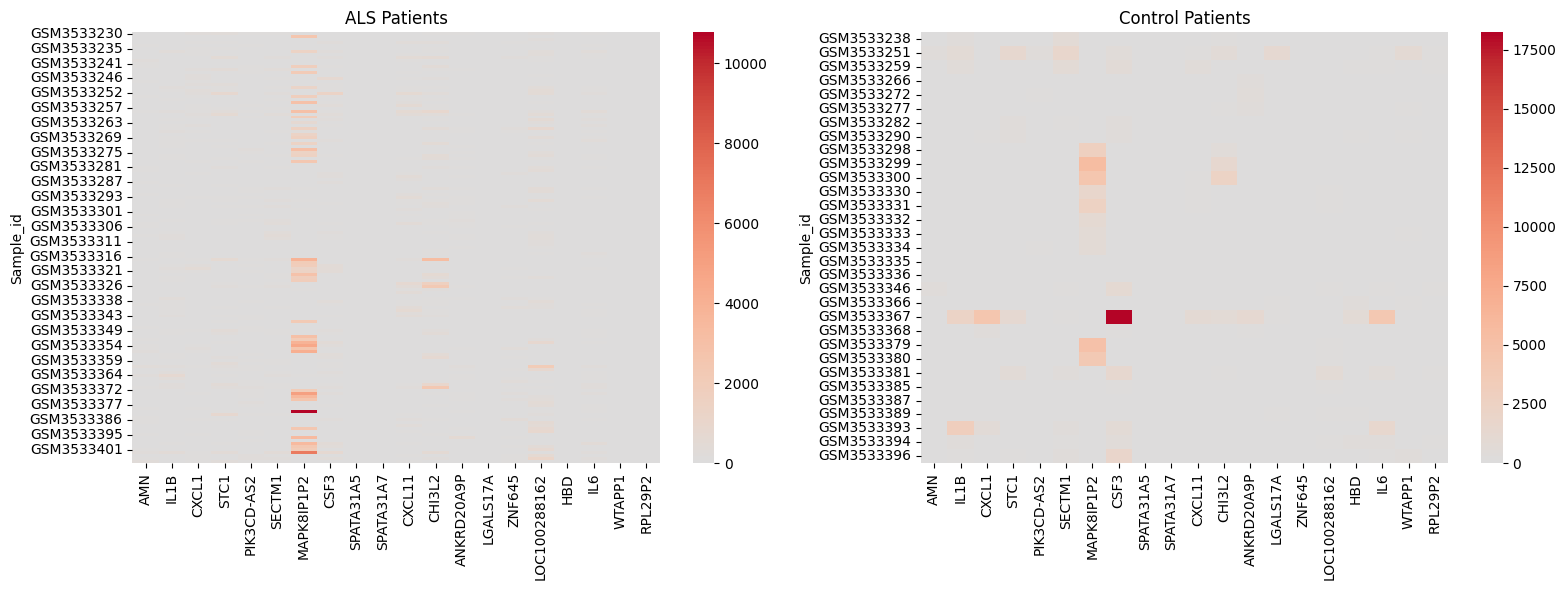

 20%|██        | 1/5 [00:06<00:24,  6.00s/it]

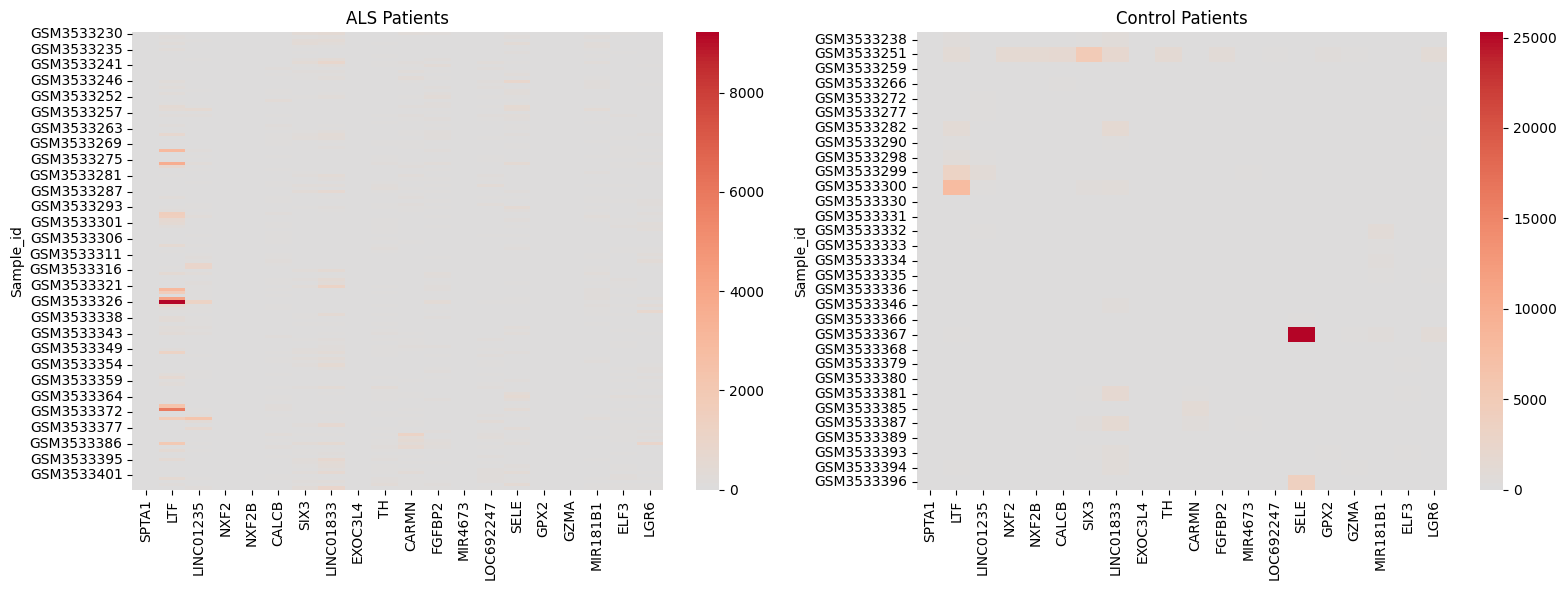

 40%|████      | 2/5 [00:11<00:17,  5.91s/it]

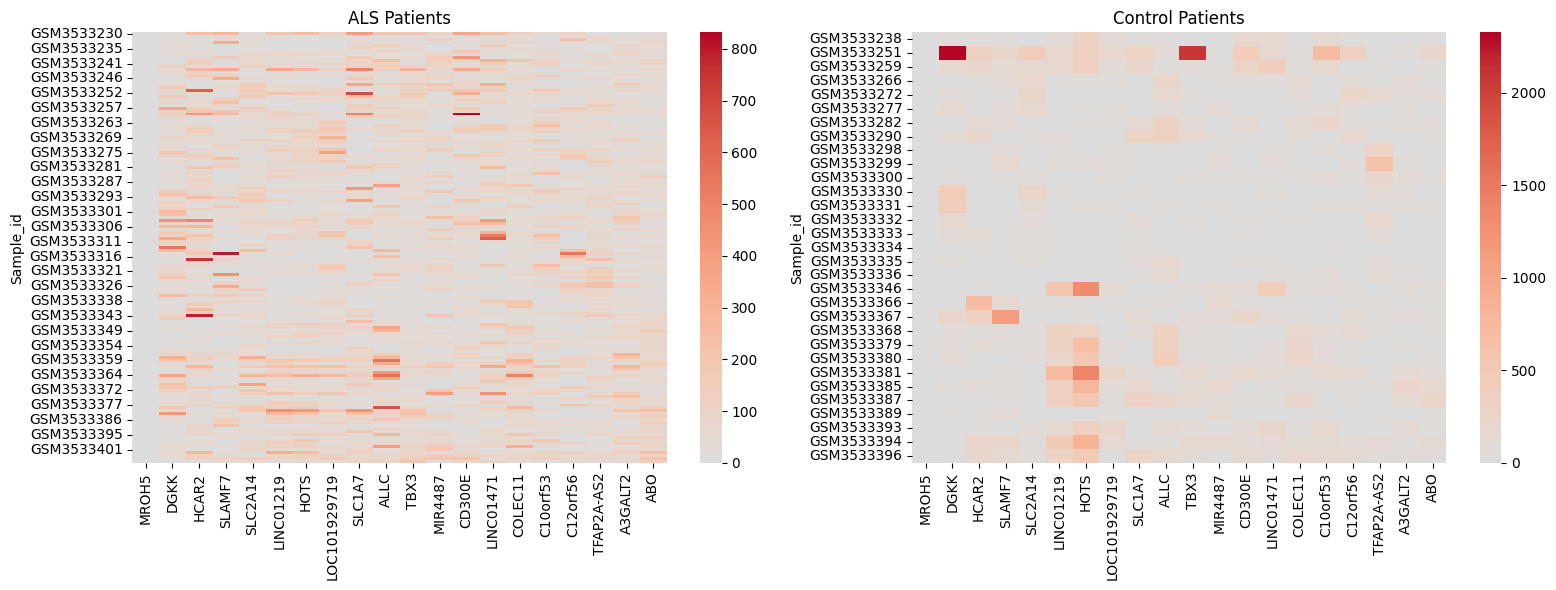

 60%|██████    | 3/5 [00:17<00:11,  5.95s/it]

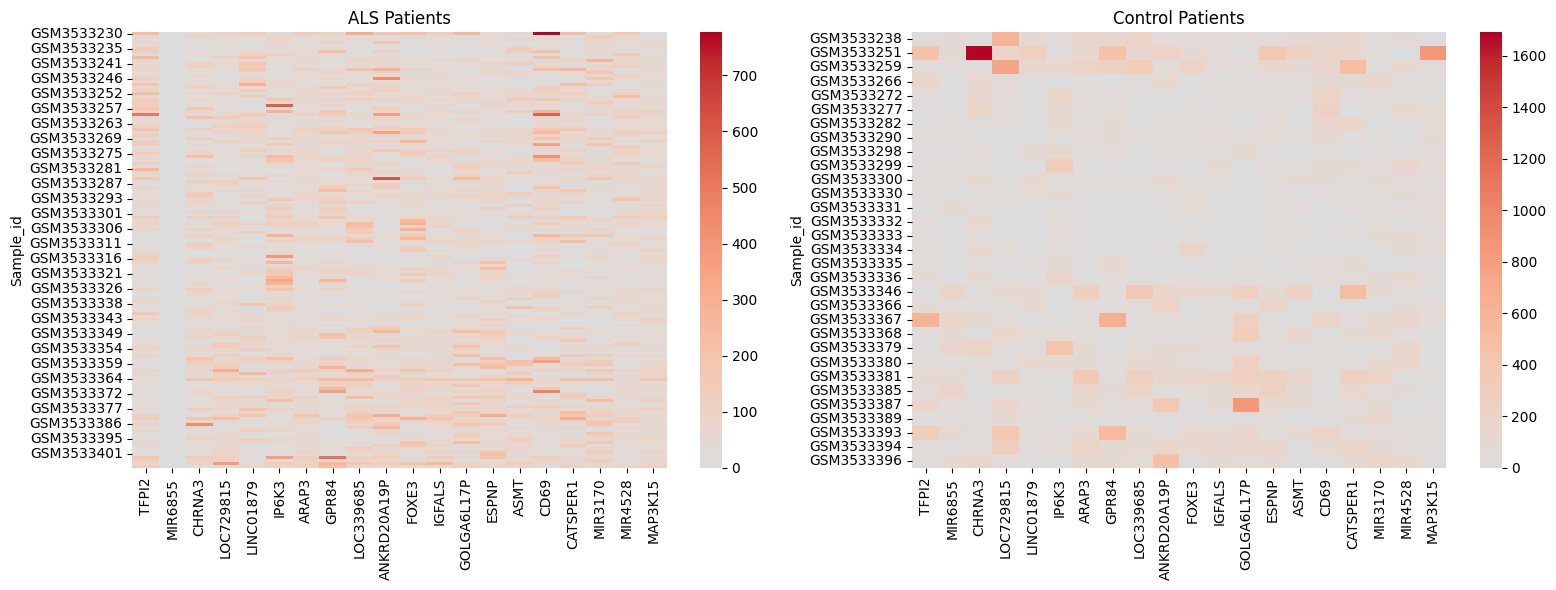

 80%|████████  | 4/5 [00:23<00:05,  5.87s/it]

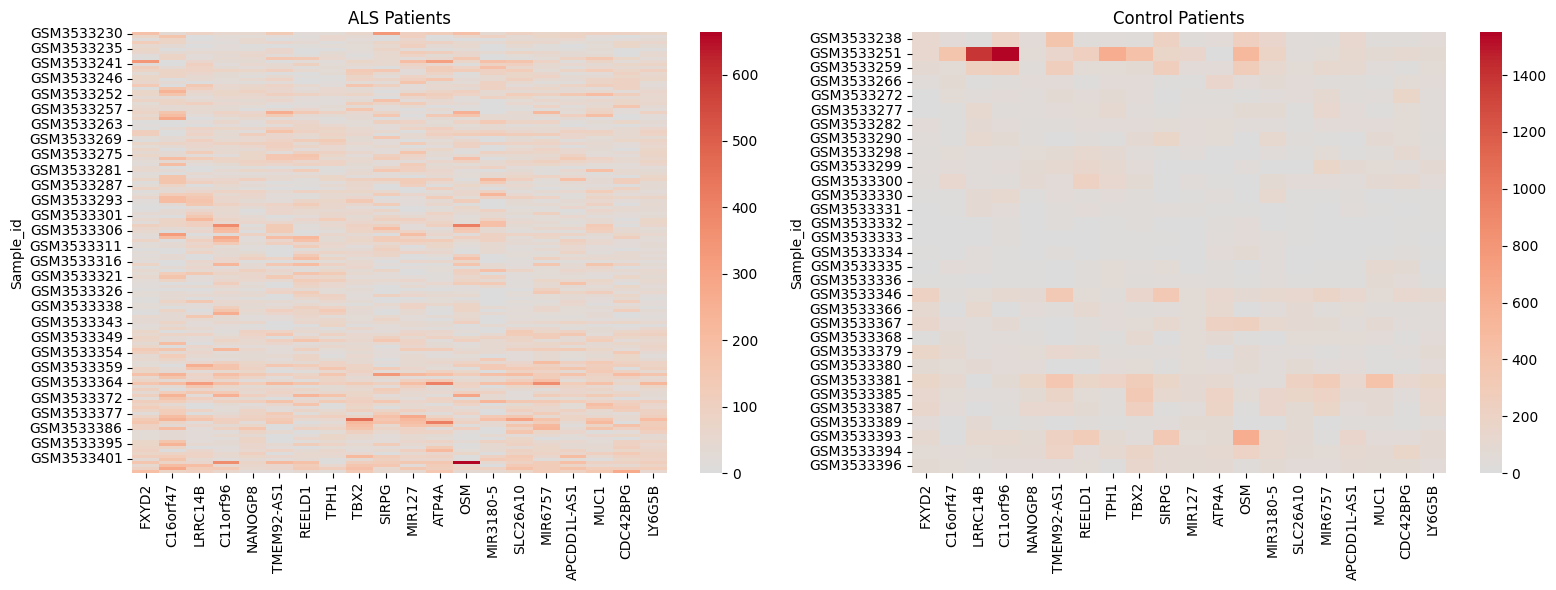

100%|██████████| 5/5 [00:28<00:00,  5.60s/it]


In [ ]:
for i in tqdm(range(0, len(gene_names), 20)) :
    subset_genes = gene_names[i:i+20]
    heatmap_comparison(subset_genes, c_data.get_data_als(), c_data.get_data_control())